# Project - Result and Report Analysis

Lab Group 8:

- Gnana Spandana Akumalla
- Patrik Svensson
- Serkan Arda Yilal

In this report, we are going to import all the models, histories, and reports. Then we are going to do result and report analysis with plots and figures.

In [1]:
import os 
import time
import gc
import pickle
from datetime import datetime
from timeit import default_timer as timer
import random
random.seed(0)

from keras.layers import Dense, Conv2D,MaxPooling2D, Flatten, Dropout
import tensorflow as tf 
tf.random.set_seed(0)
import keras
from statistics import mean as mean_calc

from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout, BatchNormalization, SpatialDropout2D
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Conv2D, Conv2DTranspose, concatenate


from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.metrics import Precision, Recall, AUC, Accuracy

import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)

from Utils_project import load_data, get_sec, train_val_folds, plot_roc, plot_results, dict_of_histories, dict_of_models


import psutil






### Table of Contents

* [1-Importing Reports, Models and Training Histories](#import)
    * [1.1-Importing Reports](#import_report)
    * [1.2-Importing Models](#import_model)
    * [1.3-Importing Training Histories](#import_history)
    * [1.4 Examples from contents of imported files](#example)    
    
* [2-Distribution of Best Epochs](#best_epoch) 
* [3-Mean AUROC Behaviour based on chosen settings](#mean_auroc)
* [4-Ranking based on Avg Validation AUROC Score](#rank_auroc)
* [5-Plotting Training Trends](#best_epoch)
* [6- Plotting ROCs](#plot_roc)
    * [6.2 ROC Plots for 256x256](#plot_roc_256)
    * [6.2 ROC Plots for 128x128](#plot_roc_128)
* [7-Average Training Time Comparisons](#time_comp) 

## 1-Importing Reports, Models and Training Histories <a class="anchor" id="import"></a>

In following part, we are importing reports, models, and training histories with functions defined in *Utils_project.py*

### 1.1-Importing Reports <a class="anchor" id="import_report"></a>

In [2]:
current_dir =os.getcwd()


best_models_path = os.path.join(current_dir, "best_models")
model_histories_path = os.path.join(current_dir, "model_histories")
training_results_path = os.path.join(current_dir, "training_results")
figures_path = os.path.join(current_dir, "figures")

if not os.path.exists(figures_path):
    os.mkdir(figures_path)
    print("figures directory is created " + figures_path)



In [3]:
report_256_name = "Hyperparameter_tuning_report_06-11-2023_18-06-42"
report_256 = pd.read_csv(os.path.join(training_results_path, report_256_name + ".txt"), sep = "\t")

report_128_name = "Hyperparameter_tuning_report_07-11-2023_07-26-36"
report_128 = pd.read_csv(os.path.join(training_results_path, report_128_name + ".txt"), sep = "\t")

report_256_pretrained_name = "Hyperparameter_tuning_report_07-11-2023_19-17-17"
report_256_pretrained = pd.read_csv(os.path.join(training_results_path, report_256_pretrained_name + ".txt"), sep = "\t")

report_128_pretrained_name = "Hyperparameter_tuning_report_07-11-2023_19-40-59"
report_128_pretrained = pd.read_csv(os.path.join(training_results_path, report_128_pretrained_name + ".txt"), sep = "\t")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### 1.2-Importing Models <a class="anchor" id="import_model"></a>

In [4]:
model_256_dict = dict_of_models(best_models_path, "best_models_session_06-11-2023_18-06-42")

Models for setting 01 is being loaded...
Models for setting 02 is being loaded...
Models for setting 03 is being loaded...
Models for setting 04 is being loaded...
Models for setting 05 is being loaded...
Models for setting 06 is being loaded...
Models for setting 07 is being loaded...
Models for setting 08 is being loaded...
Models for setting 09 is being loaded...
Models for setting 10 is being loaded...
Models for setting 11 is being loaded...
Models for setting 12 is being loaded...
Models for setting 13 is being loaded...
Models for setting 14 is being loaded...
Models for setting 15 is being loaded...
Models for setting 16 is being loaded...
Models for setting 17 is being loaded...
Models for setting 18 is being loaded...


In [5]:
model_128_dict = dict_of_models(best_models_path, "best_models_session_07-11-2023_07-26-36")

Models for setting 01 is being loaded...
Models for setting 02 is being loaded...
Models for setting 03 is being loaded...
Models for setting 04 is being loaded...
Models for setting 05 is being loaded...
Models for setting 06 is being loaded...
Models for setting 07 is being loaded...
Models for setting 08 is being loaded...
Models for setting 09 is being loaded...
Models for setting 10 is being loaded...
Models for setting 11 is being loaded...
Models for setting 12 is being loaded...
Models for setting 13 is being loaded...
Models for setting 14 is being loaded...
Models for setting 15 is being loaded...
Models for setting 16 is being loaded...
Models for setting 17 is being loaded...
Models for setting 18 is being loaded...


In [6]:
model_256_pretrained_dict = dict_of_models(best_models_path, "best_models_session_07-11-2023_19-17-17")

Models for setting 01 is being loaded...
Models for setting 02 is being loaded...
Models for setting 03 is being loaded...
Models for setting 04 is being loaded...
Models for setting 05 is being loaded...
Models for setting 06 is being loaded...


In [7]:
model_128_pretrained_dict = dict_of_models(best_models_path, "best_models_session_07-11-2023_19-40-59")

Models for setting 01 is being loaded...
Models for setting 02 is being loaded...
Models for setting 03 is being loaded...
Models for setting 04 is being loaded...
Models for setting 05 is being loaded...
Models for setting 06 is being loaded...


### 1.3-Importing Training Histories <a class="anchor" id="import_history"></a>

In [8]:
history_256_dict = dict_of_histories(model_histories_path, "model_histories_session_06-11-2023_18-06-42")

Histories for setting 01 is being loaded...
Histories for setting 02 is being loaded...
Histories for setting 03 is being loaded...
Histories for setting 04 is being loaded...
Histories for setting 05 is being loaded...
Histories for setting 06 is being loaded...
Histories for setting 07 is being loaded...
Histories for setting 08 is being loaded...
Histories for setting 09 is being loaded...
Histories for setting 10 is being loaded...
Histories for setting 11 is being loaded...
Histories for setting 12 is being loaded...
Histories for setting 13 is being loaded...
Histories for setting 14 is being loaded...
Histories for setting 15 is being loaded...
Histories for setting 16 is being loaded...
Histories for setting 17 is being loaded...
Histories for setting 18 is being loaded...


In [9]:
history_128_dict = dict_of_histories(model_histories_path, "model_histories_session_07-11-2023_07-26-36")

Histories for setting 01 is being loaded...
Histories for setting 02 is being loaded...
Histories for setting 03 is being loaded...
Histories for setting 04 is being loaded...
Histories for setting 05 is being loaded...
Histories for setting 06 is being loaded...
Histories for setting 07 is being loaded...
Histories for setting 08 is being loaded...
Histories for setting 09 is being loaded...
Histories for setting 10 is being loaded...
Histories for setting 11 is being loaded...
Histories for setting 12 is being loaded...
Histories for setting 13 is being loaded...
Histories for setting 14 is being loaded...
Histories for setting 15 is being loaded...
Histories for setting 16 is being loaded...
Histories for setting 17 is being loaded...
Histories for setting 18 is being loaded...


In [10]:
history_256_pretrained_dict = dict_of_histories(model_histories_path, "model_histories_session_07-11-2023_19-17-17")

Histories for setting 01 is being loaded...
Histories for setting 02 is being loaded...
Histories for setting 03 is being loaded...
Histories for setting 04 is being loaded...
Histories for setting 05 is being loaded...
Histories for setting 06 is being loaded...


In [11]:
history_128_pretrained_dict = dict_of_histories(model_histories_path, "model_histories_session_07-11-2023_19-40-59")

Histories for setting 01 is being loaded...
Histories for setting 02 is being loaded...
Histories for setting 03 is being loaded...
Histories for setting 04 is being loaded...
Histories for setting 05 is being loaded...
Histories for setting 06 is being loaded...


### 1.4 Examples from contents of imported files <a class="anchor" id="example"></a>

In [12]:
model_256_dict["setting_01_fold_1"]

In [13]:
history_256_dict["setting_01_fold_1"].keys()

dict_keys(['loss', 'auc', 'binary_accuracy', 'precision', 'recall', 'val_loss', 'val_auc', 'val_binary_accuracy', 'val_precision', 'val_recall'])

In [14]:
report_256

,Setting_number,img_width,img_height,ch,n_base,dropout,dense_layers,n_class,l2_reg,act_func,loss_type,learning_rate,epochs,batch_size,CV1_best_loss_epoch,CV2_best_loss_epoch,CV3_best_loss_epoch,CV1_best_auroc_epoch,CV2_best_auroc_epoch,CV3_best_auroc_epoch,CV1_train_time,CV2_train_time,CV3_train_time,CV1_val_loss,CV2_val_loss,CV3_val_loss,CV1_val_acc,CV2_val_acc,CV3_val_acc,CV1_val_auroc,CV2_val_auroc,CV3_val_auroc,CV1_val_precision,CV2_val_precision,CV3_val_precision,CV1_val_recall,CV2_val_recall,CV3_val_recall,CV_avg_val_acc,CV_avg_val_auroc,CV_avg_val_precision,CV_avg_val_recall
0,1,256,256,1,8,0.2,"[32, 32]",2,0.0001,relu,BinaryCrossentropy,0.0001,125,32,41,46,47,27,55,97,00:07:20,00:07:23,00:07:24,0.395230,0.335493,0.350799,0.834959,0.879970,0.895052,0.905033,0.940745,0.947035,0.917241,0.873846,0.904688,1.000000,0.993976,0.993930,0.869994,0.930938,0.898592,0.995969
1,2,256,256,1,8,0.2,"[32, 32]",2,0.0001,tanh,BinaryCrossentropy,0.0001,125,32,16,13,4,17,19,16,00:07:22,00:07:22,00:07:17,0.480407,0.466260,0.503654,0.818455,0.828207,0.814843,0.886837,0.895738,0.888395,0.847134,0.887719,0.875546,0.909897,0.918675,0.957511,0.820501,0.890323,0.870133,0.928694
2,3,256,256,1,8,0.2,"[64, 64]",2,0.0001,relu,BinaryCrossentropy,0.0001,125,32,32,52,44,34,70,99,00:07:22,00:07:24,00:07:23,0.396869,0.366190,0.367942,0.846212,0.861965,0.886057,0.914579,0.930468,0.940391,0.888446,0.974576,0.910035,0.935007,1.000000,0.984825,0.864745,0.928479,0.924352,0.973278
3,4,256,256,1,8,0.2,"[64, 64]",2,0.0001,tanh,BinaryCrossentropy,0.0001,125,32,17,14,8,20,18,15,00:07:19,00:07:21,00:07:22,0.494864,0.477043,0.511342,0.819205,0.825206,0.814093,0.893725,0.897548,0.886029,0.977528,0.866477,0.856369,0.937962,0.938253,0.946889,0.819501,0.892434,0.900125,0.941035
4,5,256,256,1,8,0.2,"[128, 128]",2,0.0001,relu,BinaryCrossentropy,0.0001,125,32,18,20,16,22,20,50,00:07:20,00:07:22,00:07:26,0.410692,0.420346,0.451995,0.846962,0.840960,0.838081,0.910973,0.910284,0.905373,1.000000,1.000000,0.878788,0.949778,1.000000,0.949924,0.842001,0.908876,0.959596,0.966568
5,6,256,256,1,8,0.2,"[128, 128]",2,0.0001,tanh,BinaryCrossentropy,0.0001,125,32,15,8,6,14,8,20,00:07:22,00:07:21,00:07:22,0.506870,0.510553,0.506200,0.819955,0.807202,0.822339,0.884359,0.884509,0.897632,0.858586,0.916399,0.885154,0.935007,0.878012,1.000000,0.816499,0.888833,0.886713,0.937673
6,7,256,256,1,16,0.2,"[32, 32]",2,0.0001,relu,BinaryCrossentropy,0.0001,125,32,84,49,67,1,49,98,00:12:10,00:12:20,00:12:27,0.693280,0.376270,0.388434,0.507877,0.862716,0.874063,0.500000,0.923385,0.931263,1.000000,0.914851,0.926230,1.000000,1.000000,0.957511,0.748219,0.784883,0.947027,0.985837
7,8,256,256,1,16,0.2,"[32, 32]",2,0.0001,tanh,BinaryCrossentropy,0.0001,125,32,11,5,19,15,6,26,00:12:23,00:12:14,00:12:24,0.537805,0.538559,0.541154,0.823706,0.818455,0.827586,0.885889,0.883637,0.896080,0.871046,1.000000,0.861598,0.872969,0.941265,0.978756,0.823249,0.888535,0.910882,0.930997
8,9,256,256,1,16,0.2,"[64, 64]",2,0.0001,relu,BinaryCrossentropy,0.0001,125,32,124,24,124,1,28,2,00:12:12,00:12:18,00:12:14,0.693287,0.393057,0.693226,0.533383,0.847712,0.519490,0.500000,0.917672,0.586150,0.857143,0.890110,0.950000,1.000000,1.000000,1.000000,0.633529,0.667940,0.899084,1.000000
9,10,256,256,1,16,0.2,"[64, 64]",2,0.0001,tanh,BinaryCrossentropy,0.0001,125,32,7,7,6,8,18,17,00:12:23,00:12:19,00:12:25,0.565019,0.551491,0.570265,0.783196,0.816204,0.805847,0.871374,0.883483,0.882644,0.845133,0.920382,0.858252,0.949778,0.914157,0.963581,0.801749,0.879167,0.874589,0.942505


## 2-Distribution of Best Epochs <a class="anchor" id="best_epoch"></a>

In this part, we prepared the distribution of best epochs(epoch that the training found the highest auroc score or lowest loss on validation data) from each setting and fold combination.

In [15]:
from numpy.lib.histograms import histogram

best_loss_epochs_256 = np.array(pd.concat([report_256["CV1_best_loss_epoch"], report_256["CV2_best_loss_epoch"],
                                  report_256["CV3_best_loss_epoch"]], ignore_index=True))
best_auroc_epochs_256 = np.array(pd.concat([report_256["CV1_best_auroc_epoch"], report_256["CV2_best_auroc_epoch"],
                                  report_256["CV3_best_auroc_epoch"]], ignore_index=True))

best_loss_epochs_128 = np.array(pd.concat([report_128["CV1_best_loss_epoch"], report_128["CV2_best_loss_epoch"],
                                  report_128["CV3_best_loss_epoch"]], ignore_index=True))
best_auroc_epochs_128 = np.array(pd.concat([report_128["CV1_best_auroc_epoch"], report_128["CV2_best_auroc_epoch"],
                                  report_128["CV3_best_auroc_epoch"]], ignore_index=True))

best_loss_epochs_256_pretrained = np.array(pd.concat([report_256_pretrained["CV1_best_loss_epoch"], 
                                                      report_256_pretrained["CV2_best_loss_epoch"],
                                  report_256_pretrained["CV3_best_loss_epoch"]], ignore_index=True))
best_auroc_epochs_256_pretrained = np.array(pd.concat([report_256_pretrained["CV1_best_auroc_epoch"], 
                                                       report_256_pretrained["CV2_best_auroc_epoch"],
                                  report_256_pretrained["CV3_best_auroc_epoch"]], ignore_index=True))

best_loss_epochs_128_pretrained = np.array(pd.concat([report_128_pretrained["CV1_best_loss_epoch"], report_128_pretrained["CV2_best_loss_epoch"],
                                  report_128_pretrained["CV3_best_loss_epoch"]], ignore_index=True))
best_auroc_epochs_128_pretrained = np.array(pd.concat([report_128_pretrained["CV1_best_auroc_epoch"], report_128_pretrained["CV2_best_auroc_epoch"],
                                  report_128_pretrained["CV3_best_auroc_epoch"]], ignore_index=True))




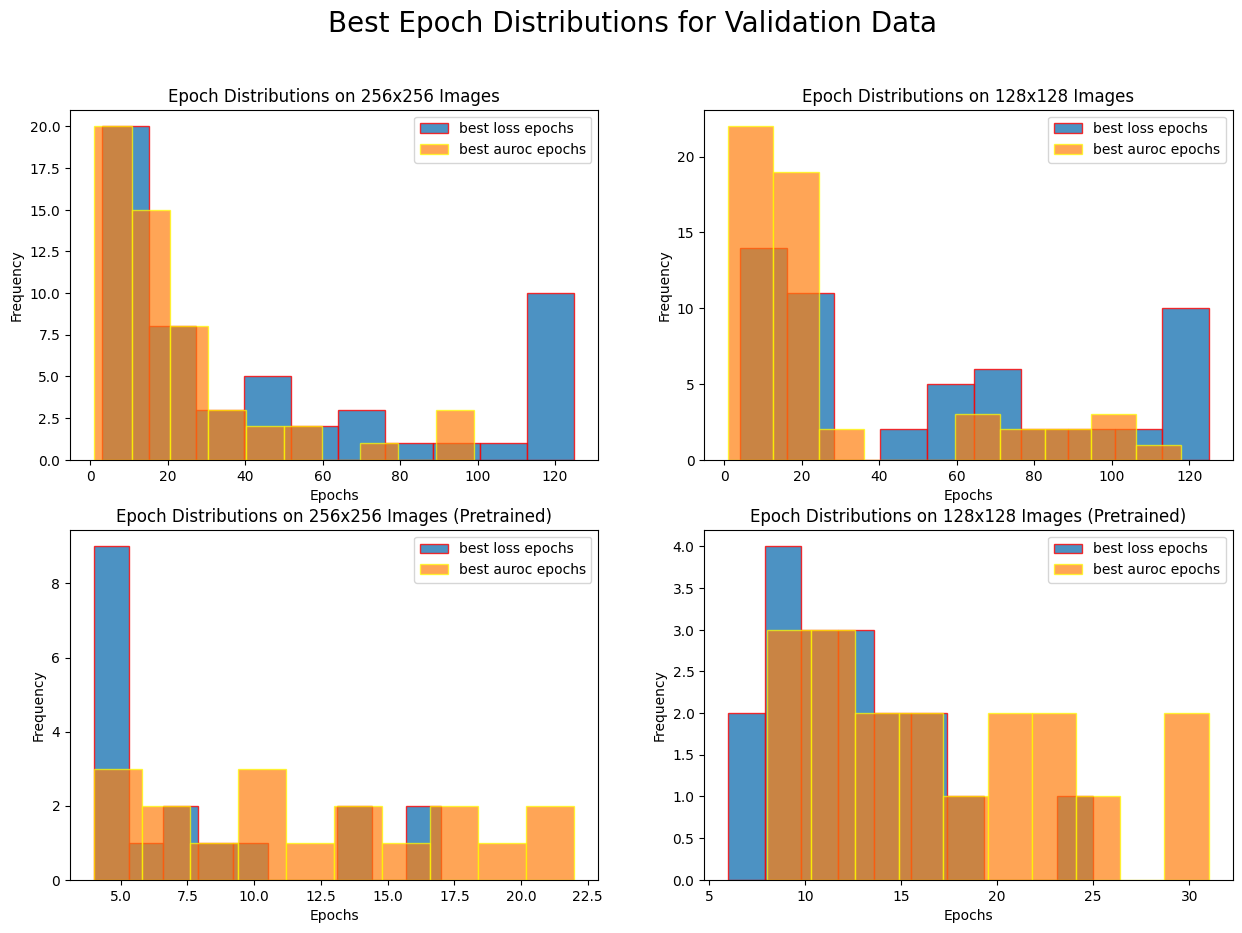

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

    
axs[0,0].hist(best_loss_epochs_256, label='best loss epochs', alpha=.8, edgecolor='red')
axs[0,0].hist(best_auroc_epochs_256, label='best auroc epochs', alpha=0.7, edgecolor='yellow')

axs[0,0].set_xlabel("Epochs")
axs[0,0].set_ylabel("Frequency")
axs[0,0].legend()

axs[0,0].title.set_text("Epoch Distributions on 256x256 Images")


axs[0,1].hist(best_loss_epochs_128, label='best loss epochs', alpha=.8, edgecolor='red')
axs[0,1].hist(best_auroc_epochs_128, label='best auroc epochs', alpha=0.7, edgecolor='yellow')

axs[0,1].set_xlabel("Epochs")
axs[0,1].set_ylabel("Frequency")
axs[0,1].legend()

axs[0,1].title.set_text("Epoch Distributions on 128x128 Images")


axs[1,0].hist(best_loss_epochs_256_pretrained, label='best loss epochs', alpha=.8, edgecolor='red')
axs[1,0].hist(best_auroc_epochs_256_pretrained, label='best auroc epochs', alpha=0.7, edgecolor='yellow')

axs[1,0].set_xlabel("Epochs")
axs[1,0].set_ylabel("Frequency")
axs[1,0].legend()

axs[1,0].title.set_text("Epoch Distributions on 256x256 Images (Pretrained)")


axs[1,1].hist(best_loss_epochs_128_pretrained, label='best loss epochs', alpha=.8, edgecolor='red')
axs[1,1].hist(best_auroc_epochs_128_pretrained, label='best auroc epochs', alpha=0.7, edgecolor='yellow')

axs[1,1].set_xlabel("Epochs")
axs[1,1].set_ylabel("Frequency")
axs[1,1].legend()

axs[1,1].title.set_text("Epoch Distributions on 128x128 Images (Pretrained)")


figure_name = "Best Epoch Distributions for Validation Data"
fig.suptitle("Best Epoch Distributions for Validation Data", fontsize=20)


plt.savefig(os.path.join(figures_path,figure_name + '.jpeg'),  bbox_inches='tight')

plt.show()

## 3-Mean AUROC Behaviour based on chosen settings <a class="anchor" id="mean_auroc"></a>

In this part, we plot the mean auroc score achieved by different settings.

In [17]:
report_256

,Setting_number,img_width,img_height,ch,n_base,dropout,dense_layers,n_class,l2_reg,act_func,loss_type,learning_rate,epochs,batch_size,CV1_best_loss_epoch,CV2_best_loss_epoch,CV3_best_loss_epoch,CV1_best_auroc_epoch,CV2_best_auroc_epoch,CV3_best_auroc_epoch,CV1_train_time,CV2_train_time,CV3_train_time,CV1_val_loss,CV2_val_loss,CV3_val_loss,CV1_val_acc,CV2_val_acc,CV3_val_acc,CV1_val_auroc,CV2_val_auroc,CV3_val_auroc,CV1_val_precision,CV2_val_precision,CV3_val_precision,CV1_val_recall,CV2_val_recall,CV3_val_recall,CV_avg_val_acc,CV_avg_val_auroc,CV_avg_val_precision,CV_avg_val_recall
0,1,256,256,1,8,0.2,"[32, 32]",2,0.0001,relu,BinaryCrossentropy,0.0001,125,32,41,46,47,27,55,97,00:07:20,00:07:23,00:07:24,0.395230,0.335493,0.350799,0.834959,0.879970,0.895052,0.905033,0.940745,0.947035,0.917241,0.873846,0.904688,1.000000,0.993976,0.993930,0.869994,0.930938,0.898592,0.995969
1,2,256,256,1,8,0.2,"[32, 32]",2,0.0001,tanh,BinaryCrossentropy,0.0001,125,32,16,13,4,17,19,16,00:07:22,00:07:22,00:07:17,0.480407,0.466260,0.503654,0.818455,0.828207,0.814843,0.886837,0.895738,0.888395,0.847134,0.887719,0.875546,0.909897,0.918675,0.957511,0.820501,0.890323,0.870133,0.928694
2,3,256,256,1,8,0.2,"[64, 64]",2,0.0001,relu,BinaryCrossentropy,0.0001,125,32,32,52,44,34,70,99,00:07:22,00:07:24,00:07:23,0.396869,0.366190,0.367942,0.846212,0.861965,0.886057,0.914579,0.930468,0.940391,0.888446,0.974576,0.910035,0.935007,1.000000,0.984825,0.864745,0.928479,0.924352,0.973278
3,4,256,256,1,8,0.2,"[64, 64]",2,0.0001,tanh,BinaryCrossentropy,0.0001,125,32,17,14,8,20,18,15,00:07:19,00:07:21,00:07:22,0.494864,0.477043,0.511342,0.819205,0.825206,0.814093,0.893725,0.897548,0.886029,0.977528,0.866477,0.856369,0.937962,0.938253,0.946889,0.819501,0.892434,0.900125,0.941035
4,5,256,256,1,8,0.2,"[128, 128]",2,0.0001,relu,BinaryCrossentropy,0.0001,125,32,18,20,16,22,20,50,00:07:20,00:07:22,00:07:26,0.410692,0.420346,0.451995,0.846962,0.840960,0.838081,0.910973,0.910284,0.905373,1.000000,1.000000,0.878788,0.949778,1.000000,0.949924,0.842001,0.908876,0.959596,0.966568
5,6,256,256,1,8,0.2,"[128, 128]",2,0.0001,tanh,BinaryCrossentropy,0.0001,125,32,15,8,6,14,8,20,00:07:22,00:07:21,00:07:22,0.506870,0.510553,0.506200,0.819955,0.807202,0.822339,0.884359,0.884509,0.897632,0.858586,0.916399,0.885154,0.935007,0.878012,1.000000,0.816499,0.888833,0.886713,0.937673
6,7,256,256,1,16,0.2,"[32, 32]",2,0.0001,relu,BinaryCrossentropy,0.0001,125,32,84,49,67,1,49,98,00:12:10,00:12:20,00:12:27,0.693280,0.376270,0.388434,0.507877,0.862716,0.874063,0.500000,0.923385,0.931263,1.000000,0.914851,0.926230,1.000000,1.000000,0.957511,0.748219,0.784883,0.947027,0.985837
7,8,256,256,1,16,0.2,"[32, 32]",2,0.0001,tanh,BinaryCrossentropy,0.0001,125,32,11,5,19,15,6,26,00:12:23,00:12:14,00:12:24,0.537805,0.538559,0.541154,0.823706,0.818455,0.827586,0.885889,0.883637,0.896080,0.871046,1.000000,0.861598,0.872969,0.941265,0.978756,0.823249,0.888535,0.910882,0.930997
8,9,256,256,1,16,0.2,"[64, 64]",2,0.0001,relu,BinaryCrossentropy,0.0001,125,32,124,24,124,1,28,2,00:12:12,00:12:18,00:12:14,0.693287,0.393057,0.693226,0.533383,0.847712,0.519490,0.500000,0.917672,0.586150,0.857143,0.890110,0.950000,1.000000,1.000000,1.000000,0.633529,0.667940,0.899084,1.000000
9,10,256,256,1,16,0.2,"[64, 64]",2,0.0001,tanh,BinaryCrossentropy,0.0001,125,32,7,7,6,8,18,17,00:12:23,00:12:19,00:12:25,0.565019,0.551491,0.570265,0.783196,0.816204,0.805847,0.871374,0.883483,0.882644,0.845133,0.920382,0.858252,0.949778,0.914157,0.963581,0.801749,0.879167,0.874589,0.942505


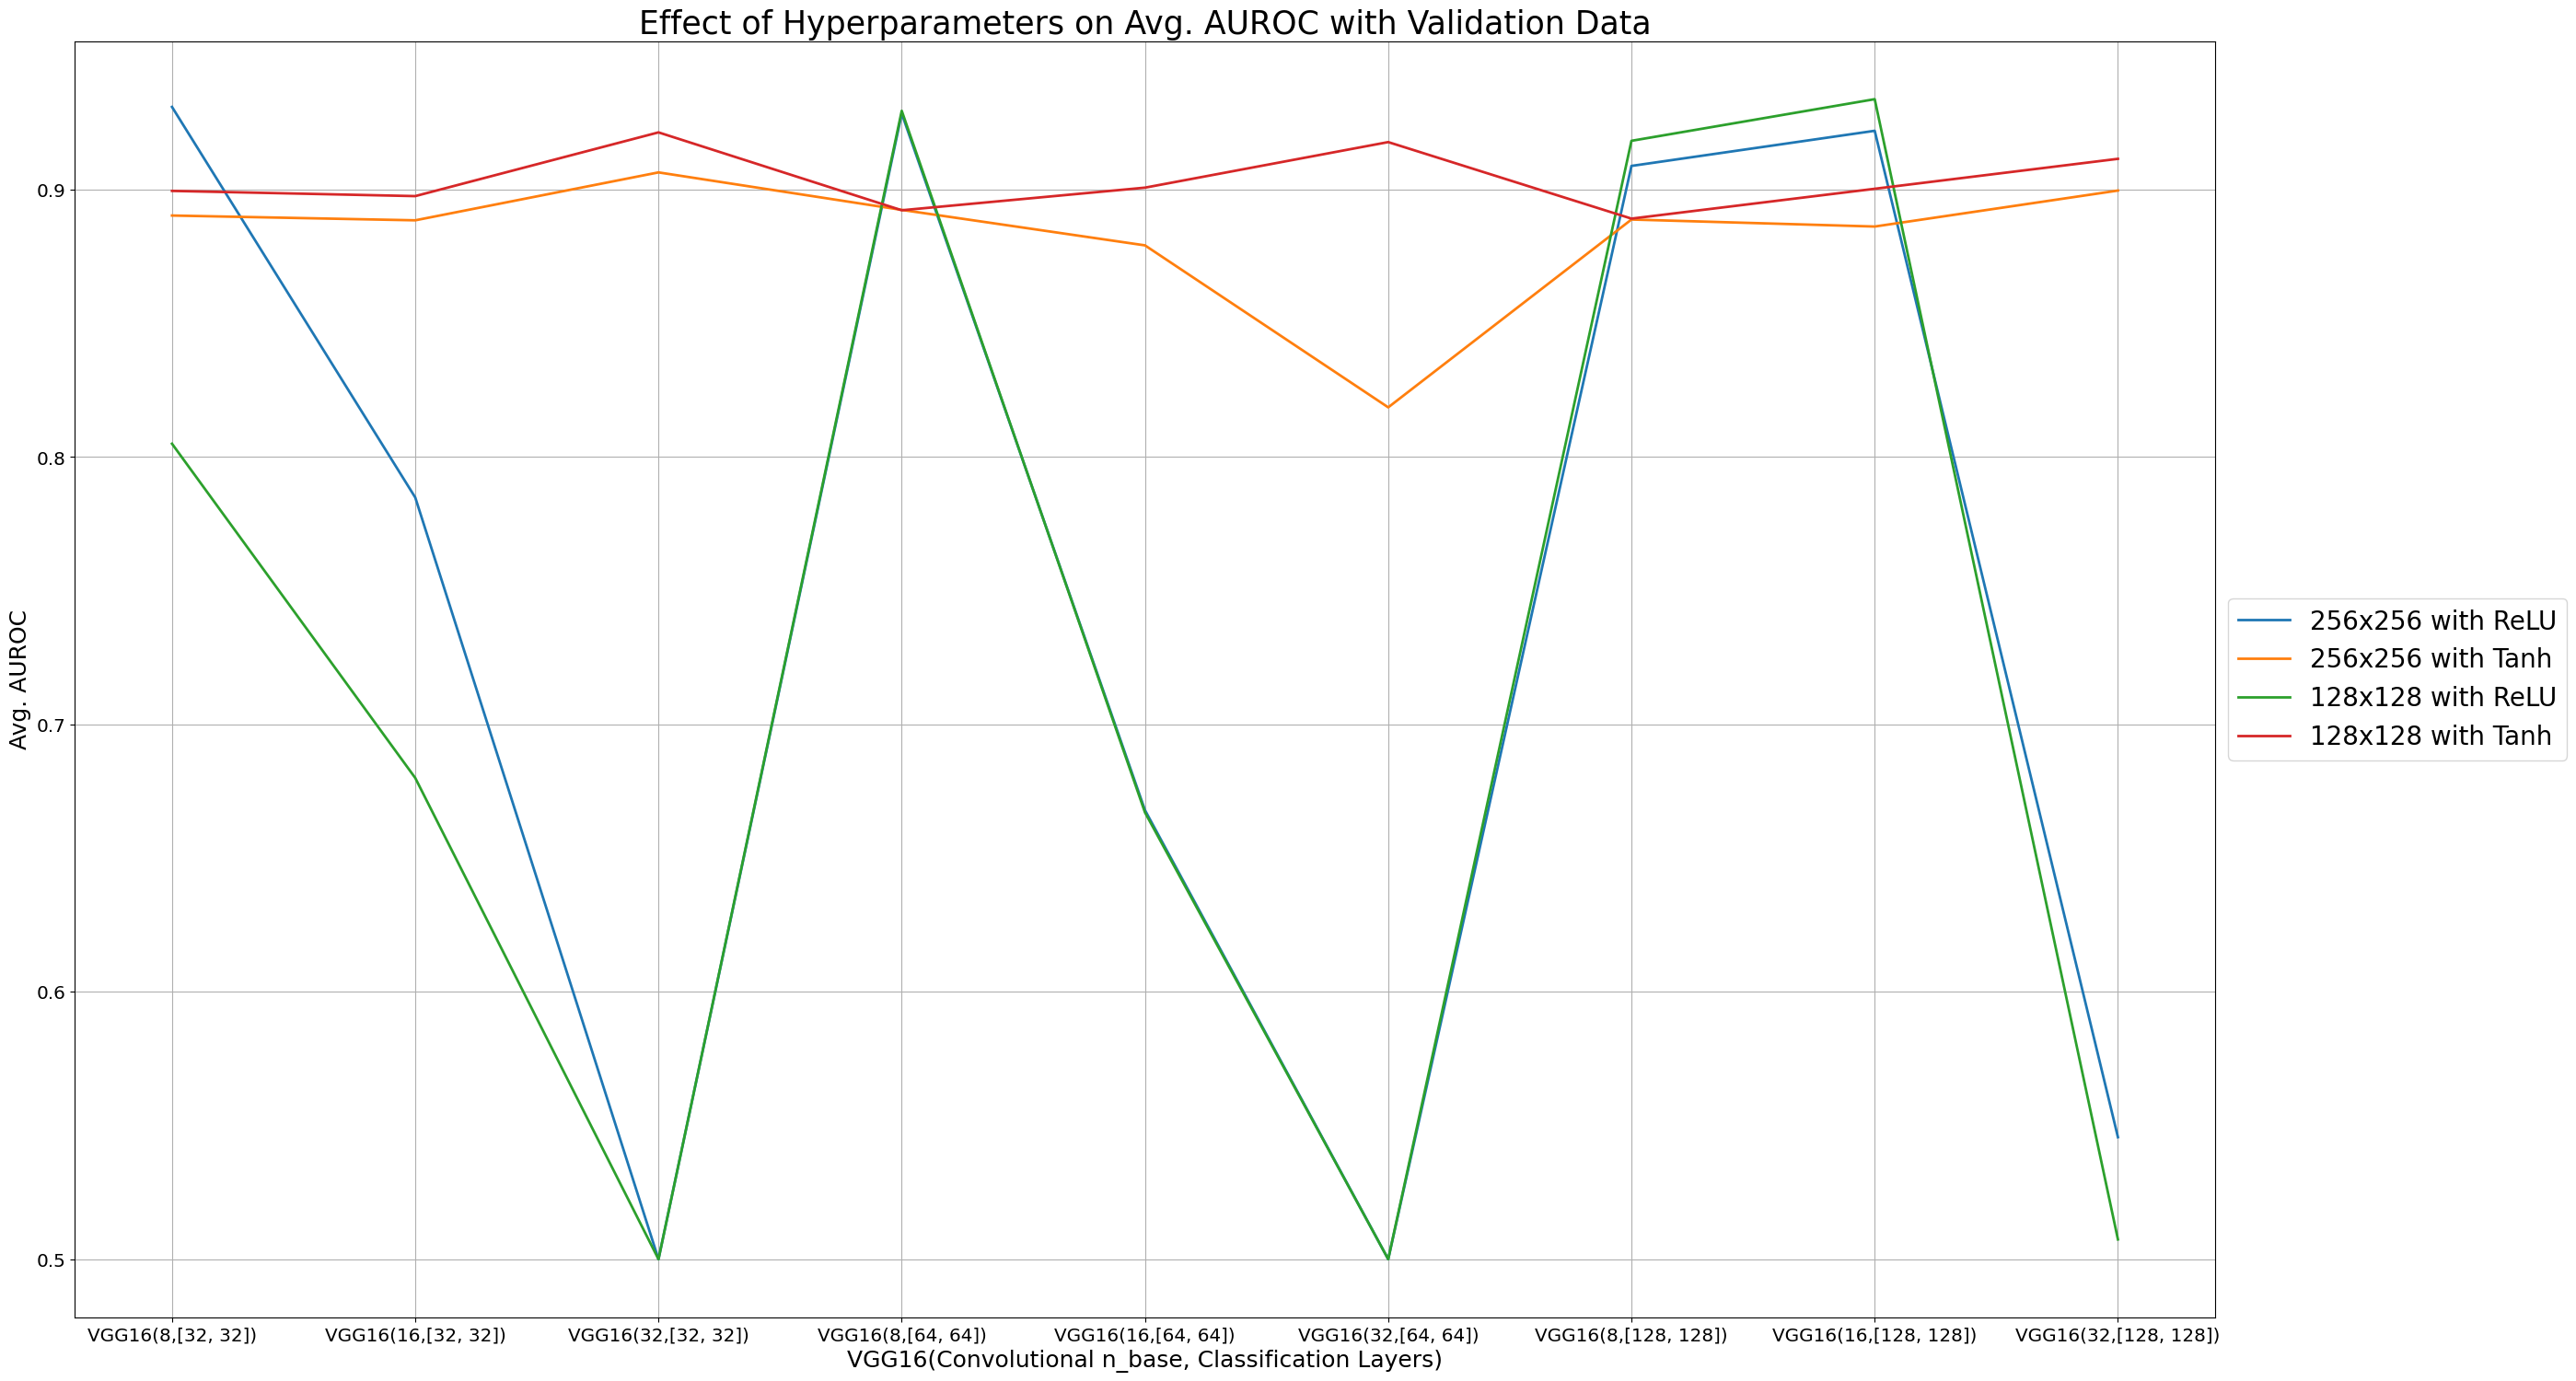

In [18]:
# The following makes the plot look nice
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 18),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

dense_layers_settings = ["[32, 32]", "[64, 64]", "[128, 128]"]
n_base_settings = [8, 16, 32]
x_axis = []

for dense_layers in dense_layers_settings:
    for n_base in n_base_settings:
        x_axis.append("VGG16(" + str(n_base) + "," + str(dense_layers) + ")")
        
auroc_256_relu = []
for dense_layers in dense_layers_settings:
    for n_base in n_base_settings:
        condition1 = report_256["dense_layers"] == dense_layers
        condition2 = report_256["n_base"] == n_base
        condition3 = report_256["act_func"] == "relu"
        auroc_256_relu.append(report_256[(condition1) & (condition2) & (condition3)]["CV_avg_val_auroc"].values[0])
        
auroc_256_tanh = []
for dense_layers in dense_layers_settings:
    for n_base in n_base_settings:
        condition1 = report_256["dense_layers"] == dense_layers
        condition2 = report_256["n_base"] == n_base
        condition3 = report_256["act_func"] == "tanh"
        auroc_256_tanh.append(report_256[(condition1) & (condition2) & (condition3)]["CV_avg_val_auroc"].values[0])
        
auroc_128_relu = []
for dense_layers in dense_layers_settings:
    for n_base in n_base_settings:
        condition1 = report_128["dense_layers"] == dense_layers
        condition2 = report_128["n_base"] == n_base
        condition3 = report_128["act_func"] == "relu"
        auroc_128_relu.append(report_128[(condition1) & (condition2) & (condition3)]["CV_avg_val_auroc"].values[0])
        
auroc_128_tanh = []
for dense_layers in dense_layers_settings:
    for n_base in n_base_settings:
        condition1 = report_128["dense_layers"] == dense_layers
        condition2 = report_128["n_base"] == n_base
        condition3 = report_128["act_func"] == "tanh"
        auroc_128_tanh.append(report_128[(condition1) & (condition2) & (condition3)]["CV_avg_val_auroc"].values[0]) 
        
auroc_256_relu_array = np.array(auroc_256_relu)
auroc_256_tanh_array = np.array(auroc_256_tanh)
auroc_128_relu_array = np.array(auroc_128_relu)
auroc_128_tanh_array = np.array(auroc_128_tanh)        

plt.ylabel("Avg. AUROC", fontsize = 18)
plt.xlabel("VGG16(Convolutional n_base, Classification Layers)", fontsize = 18)
# ax = plt.gca()
# ax.set_ylim([0.53, 0.59])

plt.plot(x_axis, auroc_256_relu_array, linewidth=2)
plt.plot(x_axis, auroc_256_tanh_array, linewidth=2)
plt.plot(x_axis, auroc_128_relu_array, linewidth=2)
plt.plot(x_axis, auroc_128_tanh_array, linewidth=2)


title = "Effect of Hyperparameters on Avg. AUROC with Validation Data" 
plt.title(title, fontsize = 25)
plt.legend(["256x256 with ReLU",
            "256x256 with Tanh",
            "128x128 with ReLU",
            "128x128 with Tanh",], fontsize= 20, loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig(os.path.join(figures_path,title + '.jpeg'),  bbox_inches='tight')

plt.grid()

plt.show()


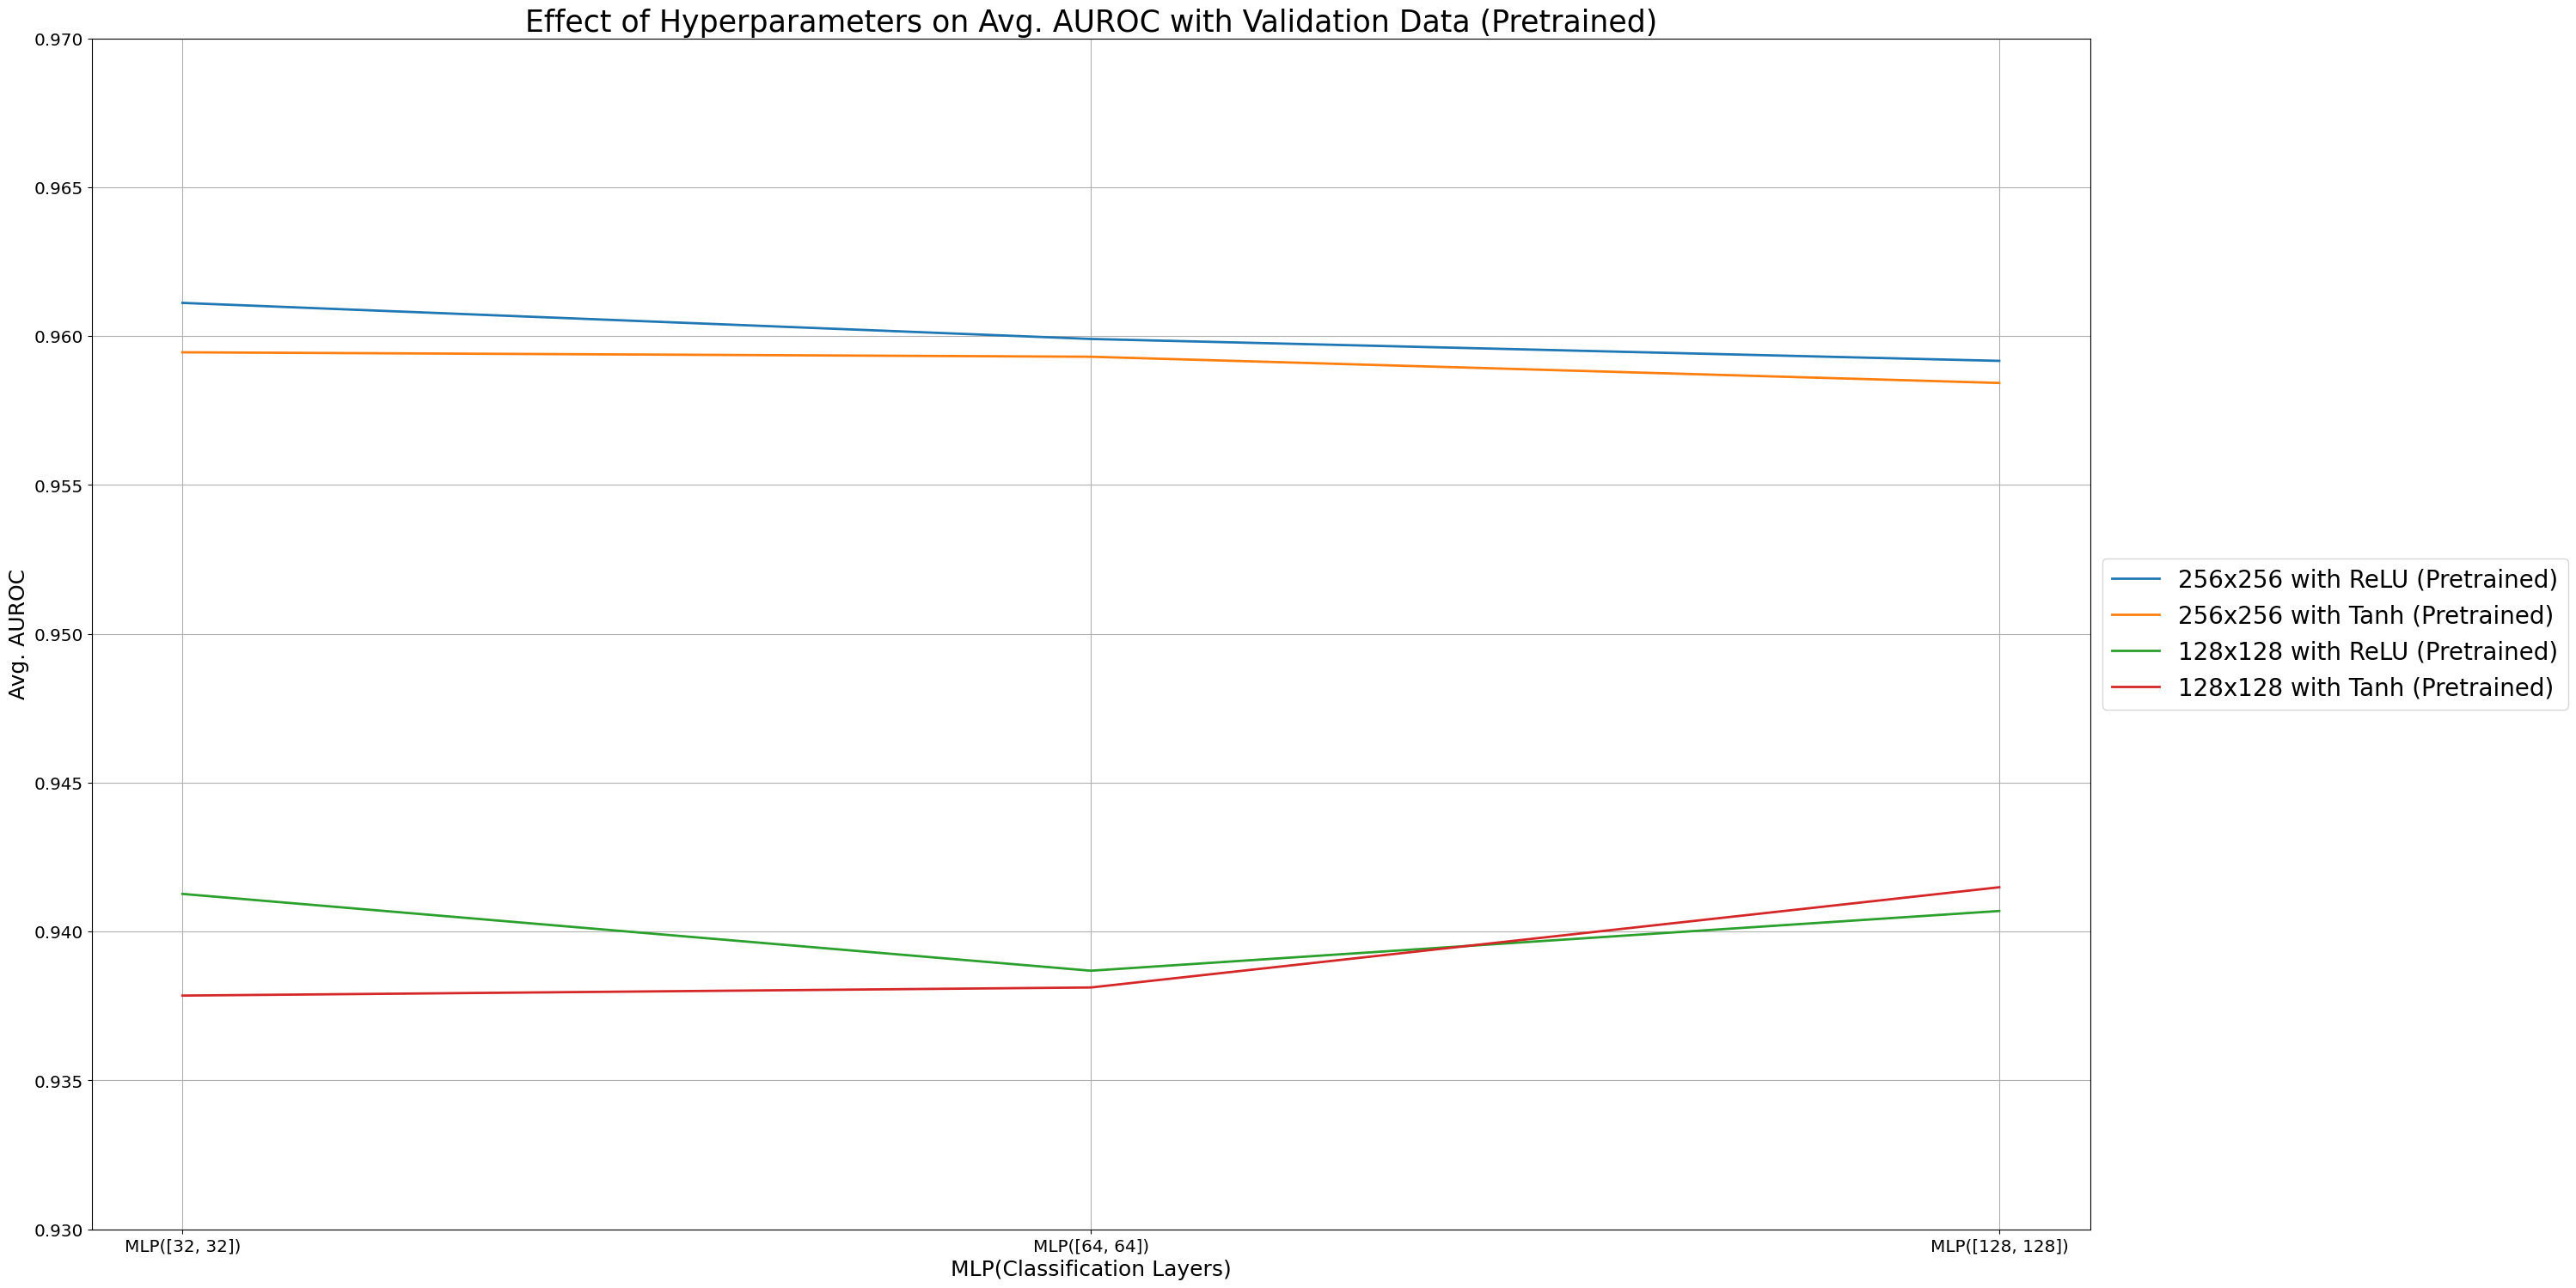

In [19]:
dense_layers_settings = ["[32, 32]", "[64, 64]", "[128, 128]"]
x_axis = []

for dense_layers in dense_layers_settings:
    x_axis.append("MLP("+ str(dense_layers) + ")")
        
auroc_256_pretrained_relu = []
for dense_layers in dense_layers_settings:

    condition1 = report_256_pretrained["dense_layers"] == dense_layers
    condition2 = report_256_pretrained["act_func"] == "relu"
    auroc_256_pretrained_relu.append(report_256_pretrained[(condition1) & (condition2) ]["CV_avg_val_auroc"].values[0])
        
auroc_256_pretrained_tanh = []
for dense_layers in dense_layers_settings:

    condition1 = report_256_pretrained["dense_layers"] == dense_layers
    condition2 = report_256_pretrained["act_func"] == "tanh"
    auroc_256_pretrained_tanh.append(report_256_pretrained[(condition1) & (condition2) ]["CV_avg_val_auroc"].values[0])
        
auroc_128_pretrained_relu = []
for dense_layers in dense_layers_settings:

    condition1 = report_128_pretrained["dense_layers"] == dense_layers
    condition2 = report_128_pretrained["act_func"] == "relu"
    auroc_128_pretrained_relu.append(report_128_pretrained[(condition1) & (condition2)]["CV_avg_val_auroc"].values[0])
        
auroc_128_pretrained_tanh = []
for dense_layers in dense_layers_settings:

    condition1 = report_128_pretrained["dense_layers"] == dense_layers
    condition2 = report_128_pretrained["act_func"] == "tanh"
    auroc_128_pretrained_tanh.append(report_128_pretrained[(condition1) & (condition2)]["CV_avg_val_auroc"].values[0]) 
        
auroc_256_relu_pretrained_array = np.array(auroc_256_pretrained_relu)
auroc_256_tanh_pretrained_array = np.array(auroc_256_pretrained_tanh)
auroc_128_relu_pretrained_array = np.array(auroc_128_pretrained_relu)
auroc_128_tanh_pretrained_array = np.array(auroc_128_pretrained_tanh)        

plt.ylabel("Avg. AUROC", fontsize = 18)
plt.xlabel("MLP(Classification Layers)", fontsize = 18)
ax = plt.gca()
ax.set_ylim([0.93, 0.97])

plt.plot(x_axis, auroc_256_relu_pretrained_array, linewidth=2)
plt.plot(x_axis, auroc_256_tanh_pretrained_array, linewidth=2)
plt.plot(x_axis, auroc_128_relu_pretrained_array, linewidth=2)
plt.plot(x_axis, auroc_128_tanh_pretrained_array, linewidth=2)


title = "Effect of Hyperparameters on Avg. AUROC with Validation Data (Pretrained)" 
plt.title(title, fontsize = 25)
plt.legend(["256x256 with ReLU (Pretrained)",
            "256x256 with Tanh (Pretrained)",
            "128x128 with ReLU (Pretrained)",
            "128x128 with Tanh (Pretrained)",], fontsize= 20, loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig(os.path.join(figures_path,title + '.jpeg'),  bbox_inches='tight')

plt.grid()

plt.show()


## 4-Ranking based on Avg Validation AUROC Score <a class="anchor" id="rank_auroc"></a>

In this section, we check the content reports and see which settings achieved the highest mean auroc score across different folds.

In [20]:
parameters_displayed = ["Setting_number","img_width","img_height","n_base", "dense_layers", "act_func", "CV_avg_val_auroc",
                       "CV1_val_auroc","CV2_val_auroc","CV3_val_auroc"]
report_256.sort_values(by="CV_avg_val_auroc", ascending=False)[parameters_displayed]

,Setting_number,img_width,img_height,n_base,dense_layers,act_func,CV_avg_val_auroc,CV1_val_auroc,CV2_val_auroc,CV3_val_auroc
0,1,256,256,8,"[32, 32]",relu,0.930938,0.905033,0.940745,0.947035
2,3,256,256,8,"[64, 64]",relu,0.928479,0.914579,0.930468,0.940391
10,11,256,256,16,"[128, 128]",relu,0.922018,0.909515,0.926311,0.930229
4,5,256,256,8,"[128, 128]",relu,0.908876,0.910973,0.910284,0.905373
13,14,256,256,32,"[32, 32]",tanh,0.906454,0.889762,0.916022,0.913578
17,18,256,256,32,"[128, 128]",tanh,0.899663,0.895629,0.902205,0.901154
3,4,256,256,8,"[64, 64]",tanh,0.892434,0.893725,0.897548,0.886029
1,2,256,256,8,"[32, 32]",tanh,0.890323,0.886837,0.895738,0.888395
5,6,256,256,8,"[128, 128]",tanh,0.888833,0.884359,0.884509,0.897632
7,8,256,256,16,"[32, 32]",tanh,0.888535,0.885889,0.883637,0.896080


In [21]:
report_128.sort_values(by="CV_avg_val_auroc", ascending=False)[parameters_displayed]

,Setting_number,img_width,img_height,n_base,dense_layers,act_func,CV_avg_val_auroc,CV1_val_auroc,CV2_val_auroc,CV3_val_auroc
10,11,128,128,16,"[128, 128]",relu,0.933838,0.913226,0.946137,0.942153
2,3,128,128,8,"[64, 64]",relu,0.929485,0.904109,0.950213,0.934134
13,14,128,128,32,"[32, 32]",tanh,0.921422,0.898432,0.937189,0.928645
4,5,128,128,8,"[128, 128]",relu,0.918267,0.905688,0.923859,0.925255
15,16,128,128,32,"[64, 64]",tanh,0.917789,0.906379,0.921764,0.925225
17,18,128,128,32,"[128, 128]",tanh,0.911529,0.910337,0.901491,0.922761
9,10,128,128,16,"[64, 64]",tanh,0.900750,0.904307,0.887363,0.910579
11,12,128,128,16,"[128, 128]",tanh,0.900327,0.904718,0.882983,0.913282
1,2,128,128,8,"[32, 32]",tanh,0.899532,0.912559,0.898704,0.887333
7,8,128,128,16,"[32, 32]",tanh,0.897588,0.916027,0.887800,0.888937


In [22]:
parameters_displayed = ["Setting_number","img_width","img_height","dense_layers", "act_func", "CV_avg_val_auroc",
                       "CV1_val_auroc","CV2_val_auroc","CV3_val_auroc"]
report_256_pretrained.sort_values(by="CV_avg_val_auroc", ascending=False)[parameters_displayed]

,Setting_number,img_width,img_height,dense_layers,act_func,CV_avg_val_auroc,CV1_val_auroc,CV2_val_auroc,CV3_val_auroc
0,1,256,256,"[32, 32]",relu,0.961117,0.970462,0.964186,0.948704
2,3,256,256,"[64, 64]",relu,0.959906,0.969158,0.964618,0.945942
1,2,256,256,"[32, 32]",tanh,0.959458,0.968198,0.962937,0.947239
3,4,256,256,"[64, 64]",tanh,0.959308,0.968398,0.963946,0.945581
4,5,256,256,"[128, 128]",relu,0.959170,0.968006,0.962409,0.947094
5,6,256,256,"[128, 128]",tanh,0.958428,0.967438,0.961665,0.946182


In [23]:
report_128_pretrained.sort_values(by="CV_avg_val_auroc", ascending=False)[parameters_displayed]

,Setting_number,img_width,img_height,dense_layers,act_func,CV_avg_val_auroc,CV1_val_auroc,CV2_val_auroc,CV3_val_auroc
5,6,128,128,"[128, 128]",tanh,0.941490,0.954117,0.941777,0.928576
0,1,128,128,"[32, 32]",relu,0.941266,0.953029,0.939656,0.931114
4,5,128,128,"[128, 128]",relu,0.940693,0.952029,0.940632,0.929417
2,3,128,128,"[64, 64]",relu,0.938687,0.950469,0.937463,0.928128
3,4,128,128,"[64, 64]",tanh,0.938123,0.949885,0.938287,0.926198
1,2,128,128,"[32, 32]",tanh,0.937851,0.952733,0.934134,0.926686


## 5-Plotting Training Trends <a class="anchor" id="trends"></a>

Considering we used several metrics, we can plot each training history of each setting based on those metrics. The following models used the 3rd fold.

In [24]:
histories_256 = [history_256_dict["setting_01_fold_3"], history_256_dict["setting_17_fold_3"], 
                 history_256_dict["setting_18_fold_3"]]
title_list_256 = ["Metrics for Convolutional n_base = 8, Dense layers = [32,32] w ReLU for 256x256",
              "Metrics for Convolutional n_base = 32, Dense layers = [128,128] w ReLU for 256x256",
              "Metrics for Convolutional n_base = 32, Dense layers = [128,128] w Tanh for 256x256"]

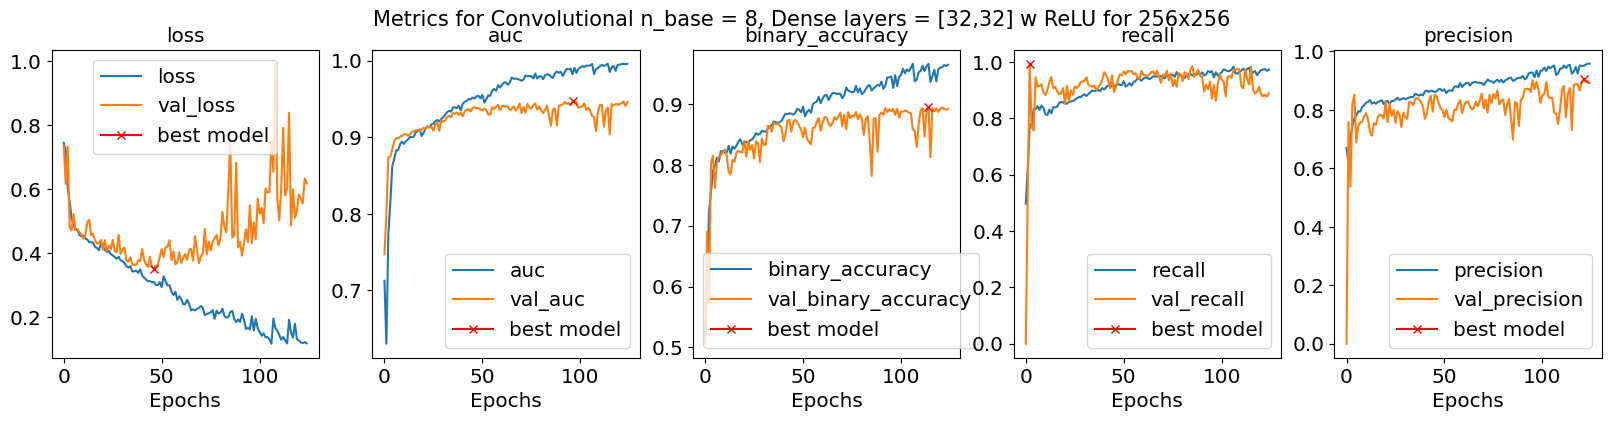

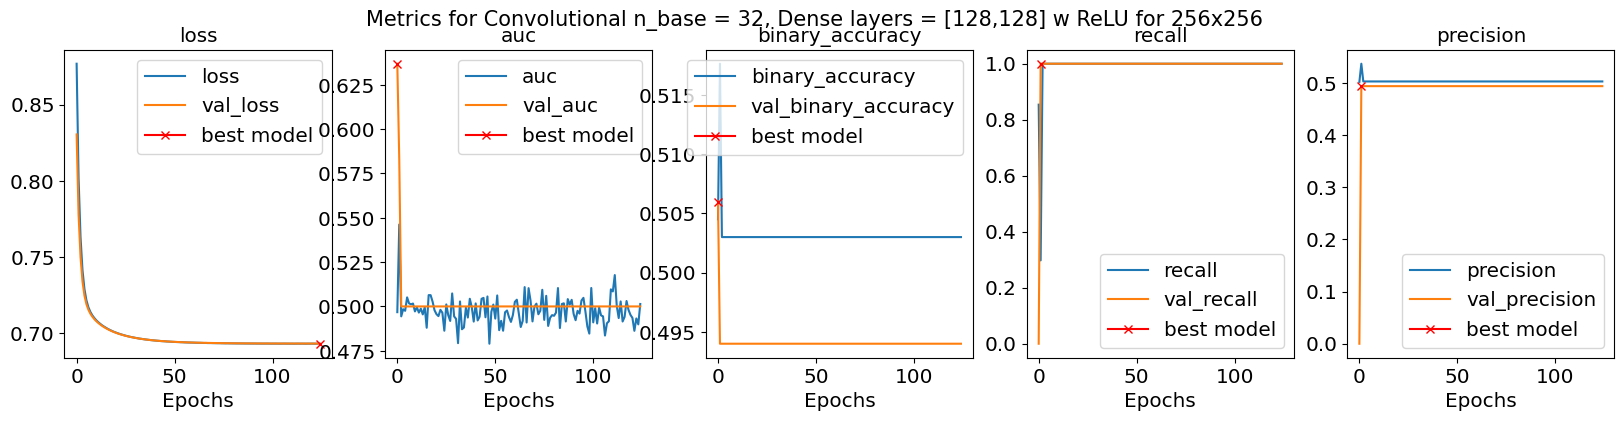

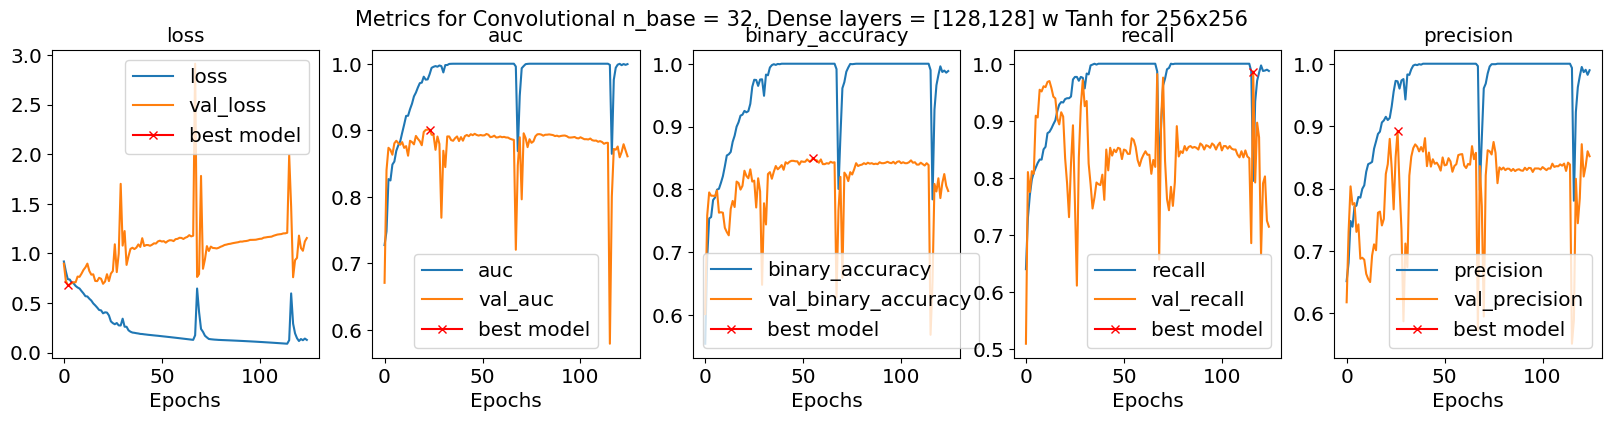

In [25]:
plot_results(histories_256,title_list_256, figures_path)

In [26]:
histories_128 = [history_128_dict["setting_11_fold_3"], history_128_dict["setting_07_fold_3"], 
                 history_128_dict["setting_08_fold_3"]]
title_list_128 = ["Metrics for Convolutional n_base = 16, Dense layers = [128,128] w ReLU for 128x128",
              "Metrics for Convolutional n_base = 16, Dense layers = [32,32] w ReLU for 128x128",
              "Metrics for Convolutional n_base = 16, Dense layers = [32,32] w Tanh for 128x128"]

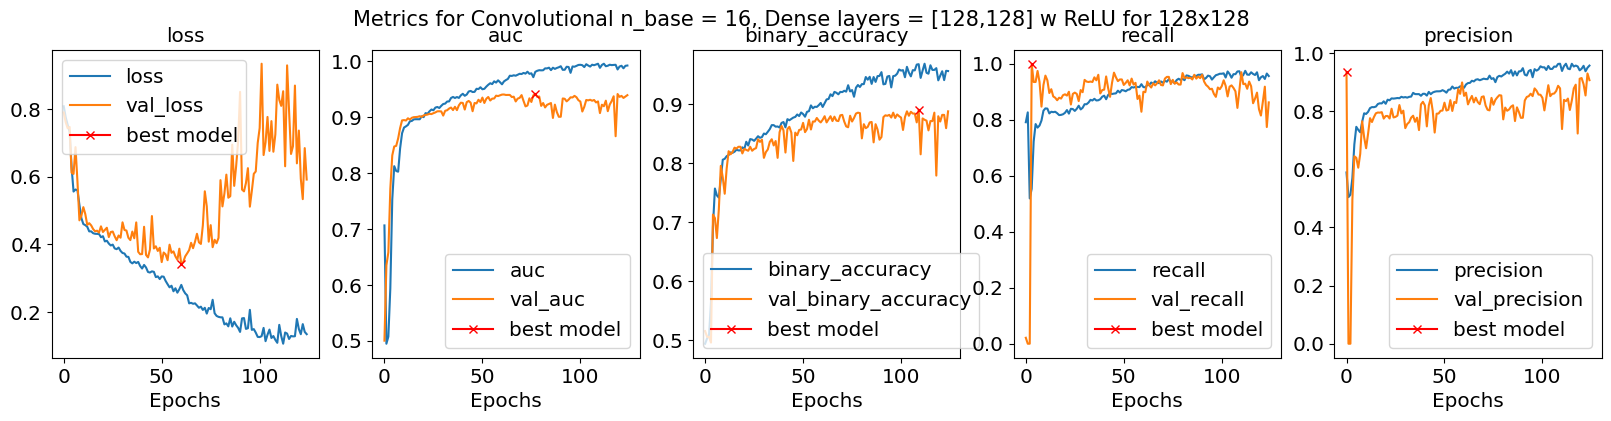

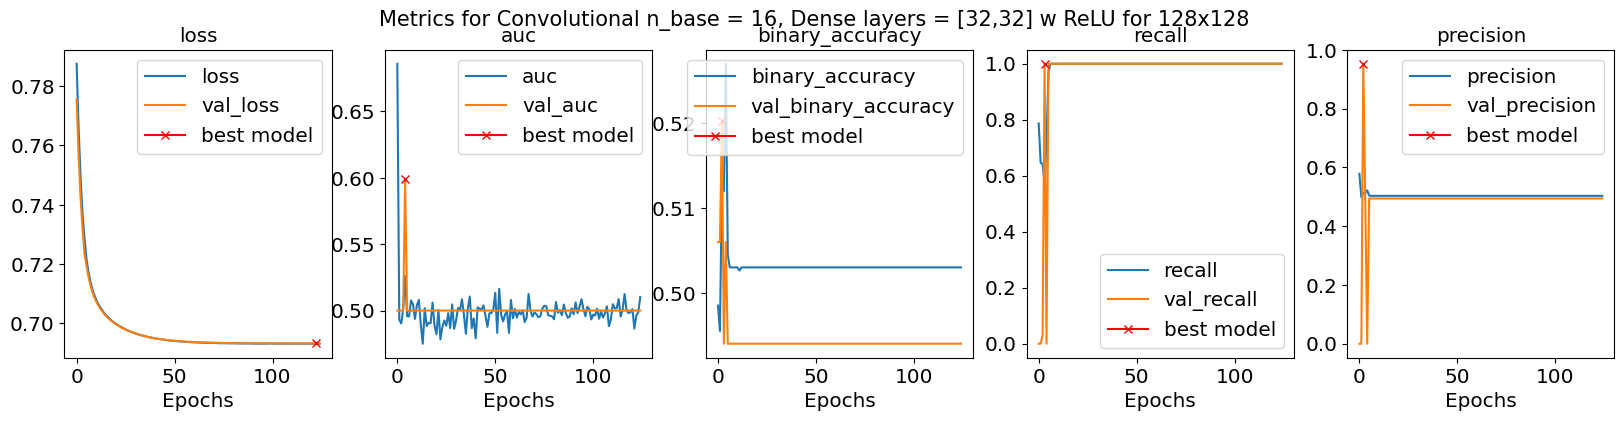

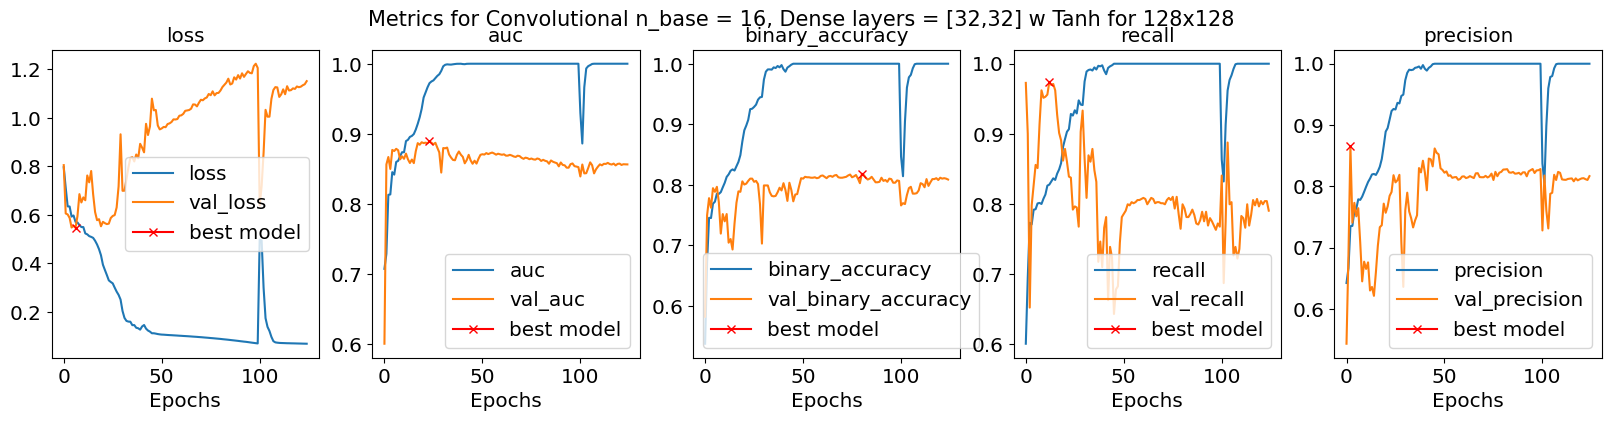

In [27]:
plot_results(histories_128,title_list_128, figures_path)

## 6- Plotting ROCs <a class="anchor" id="plot_roc"></a>

In this section, we plot rocs of trained models and compare them.

### 6.1 ROC Plots for 256x256 <a class="anchor" id="plot_roc_256"></a>

In [28]:
# Defining paths
data_dir = 'project_dataset/colon_images/'
NT_dir = os.path.join(data_dir, 'non-tumor/') # nT=non-Tumor
T_dir = os.path.join(data_dir, 'tumor/') # T=Tumor

# Defining constants
img_height=256
img_width=256

# Loads images 
t0=time.time()

NT_imgs = load_data(NT_dir, img_height, img_width, number_of_images = 2000, color = False)

print("Loading", len(NT_imgs)," non-tumor images took", round(time.time()-t0), "seconds")

t1=time.time()

T_imgs = load_data(T_dir, img_height, img_width, number_of_images = 2000, color = False)

print("Loading", len(T_imgs)," tumor images took", round(time.time()-t1), "seconds")

T_X=np.array(T_imgs)
NT_X=np.array(NT_imgs)
T_y = np.ones([len(T_imgs),1])
NT_y = np.zeros([len(NT_imgs),1])

del T_imgs, NT_imgs

gc.collect()

X = np.concatenate((T_X, NT_X))
y = np.concatenate((T_y, NT_y))

del T_X, NT_X, T_y, NT_y
gc.collect()

k=3
X, y = shuffle(X, y, random_state=0)
X_train_folds, X_val_folds, y_train_folds, y_val_folds = train_val_folds(X, y, k)
del X, y
gc.collect()

Loading 2000  non-tumor images took 101 seconds
Loading 2000  tumor images took 95 seconds
Loop 1: Training data size: 2667, Validation data size: 1333
Loop 2: Training data size: 2667, Validation data size: 1333
Loop 3: Training data size: 2666, Validation data size: 1334


0

#### 6.1.1 ROC Plots with ReLU Activation Functions

In [29]:
setting_01_fold_3_y_predicted_256 = model_256_dict["setting_01_fold_3"].predict(X_val_folds[2], batch_size = 32)

setting_03_fold_3_y_predicted_256 = model_256_dict["setting_03_fold_3"].predict(X_val_folds[2], batch_size = 32)

setting_05_fold_3_y_predicted_256 = model_256_dict["setting_05_fold_3"].predict(X_val_folds[2], batch_size = 32)

setting_07_fold_3_y_predicted_256 = model_256_dict["setting_07_fold_3"].predict(X_val_folds[2], batch_size = 32)

setting_09_fold_3_y_predicted_256 = model_256_dict["setting_09_fold_3"].predict(X_val_folds[2], batch_size = 32)

setting_11_fold_3_y_predicted_256 = model_256_dict["setting_11_fold_3"].predict(X_val_folds[2], batch_size = 32)

setting_13_fold_3_y_predicted_256 = model_256_dict["setting_13_fold_3"].predict(X_val_folds[2], batch_size = 32)

setting_15_fold_3_y_predicted_256 = model_256_dict["setting_15_fold_3"].predict(X_val_folds[2], batch_size = 32)

setting_17_fold_3_y_predicted_256 = model_256_dict["setting_17_fold_3"].predict(X_val_folds[2], batch_size = 32)

title__256_relu = "ROC Curves for 256x256 with ReLU for fold 3"
y_pred_list_256_relu=[setting_01_fold_3_y_predicted_256, setting_03_fold_3_y_predicted_256, setting_05_fold_3_y_predicted_256,
             setting_07_fold_3_y_predicted_256, setting_09_fold_3_y_predicted_256, setting_11_fold_3_y_predicted_256,
             setting_13_fold_3_y_predicted_256, setting_15_fold_3_y_predicted_256, setting_17_fold_3_y_predicted_256]

legend_list_256_relu = ["VGG16(8,[32,32])", "VGG16(8,[64,64])", "VGG16(8,[128,128])",
               "VGG16(16,[32,32])", "VGG16(16,[64,64])", "VGG16(16,[128,128])",
               "VGG16(32,[32,32])", "VGG16(32,[64,64])", "VGG16(32,[128,128])"]

42/42 [==============================] - 2s 38ms/step


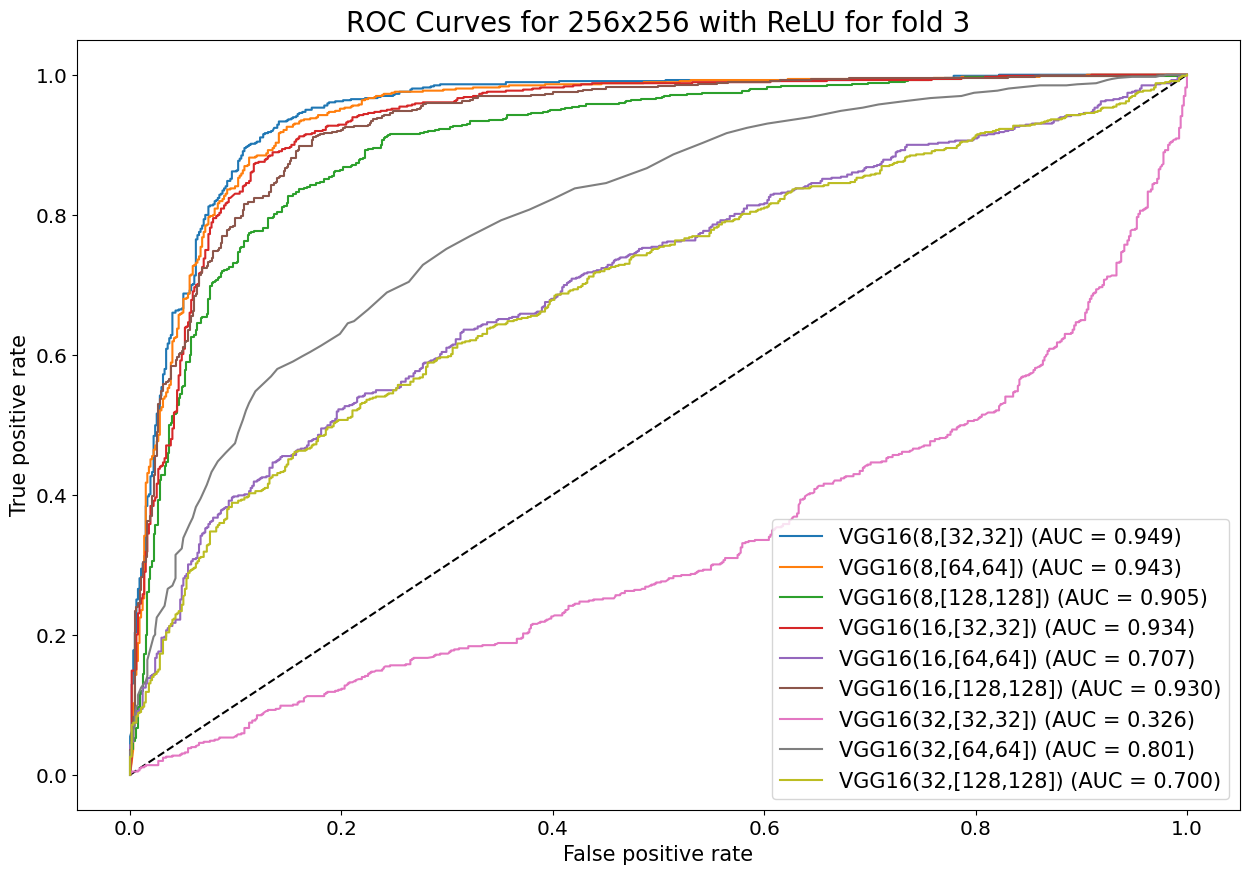

In [30]:
plot_roc(y_val_folds[2], y_pred_list_256_relu, legend_list_256_relu, title__256_relu, figures_path)


#### 6.1.2 ROC Plots with Tanh Activation Functions

In [31]:
setting_02_fold_3_y_predicted_256 = model_256_dict["setting_02_fold_3"].predict(X_val_folds[2], batch_size = 32)

setting_04_fold_3_y_predicted_256 = model_256_dict["setting_04_fold_3"].predict(X_val_folds[2], batch_size = 32)

setting_06_fold_3_y_predicted_256 = model_256_dict["setting_06_fold_3"].predict(X_val_folds[2], batch_size = 32)

setting_08_fold_3_y_predicted_256 = model_256_dict["setting_08_fold_3"].predict(X_val_folds[2], batch_size = 32)

setting_10_fold_3_y_predicted_256 = model_256_dict["setting_10_fold_3"].predict(X_val_folds[2], batch_size = 32)

setting_12_fold_3_y_predicted_256 = model_256_dict["setting_12_fold_3"].predict(X_val_folds[2], batch_size = 32)

setting_14_fold_3_y_predicted_256 = model_256_dict["setting_14_fold_3"].predict(X_val_folds[2], batch_size = 32)

setting_16_fold_3_y_predicted_256 = model_256_dict["setting_16_fold_3"].predict(X_val_folds[2], batch_size = 32)

setting_18_fold_3_y_predicted_256 = model_256_dict["setting_18_fold_3"].predict(X_val_folds[2], batch_size = 32)

title__256_tanh = "ROC Curves for 256x256 with Tanh for fold 3"
y_pred_list_256_tanh=[setting_02_fold_3_y_predicted_256, setting_04_fold_3_y_predicted_256, setting_06_fold_3_y_predicted_256,
             setting_08_fold_3_y_predicted_256, setting_10_fold_3_y_predicted_256, setting_12_fold_3_y_predicted_256,
             setting_14_fold_3_y_predicted_256, setting_16_fold_3_y_predicted_256, setting_18_fold_3_y_predicted_256]

legend_list_256_tanh = ["VGG16(8,[32,32])", "VGG16(8,[64,64])", "VGG16(8,[128,128])",
               "VGG16(16,[32,32])", "VGG16(16,[64,64])", "VGG16(16,[128,128])",
               "VGG16(32,[32,32])", "VGG16(32,[64,64])", "VGG16(32,[128,128])"]

42/42 [==============================] - 2s 37ms/step


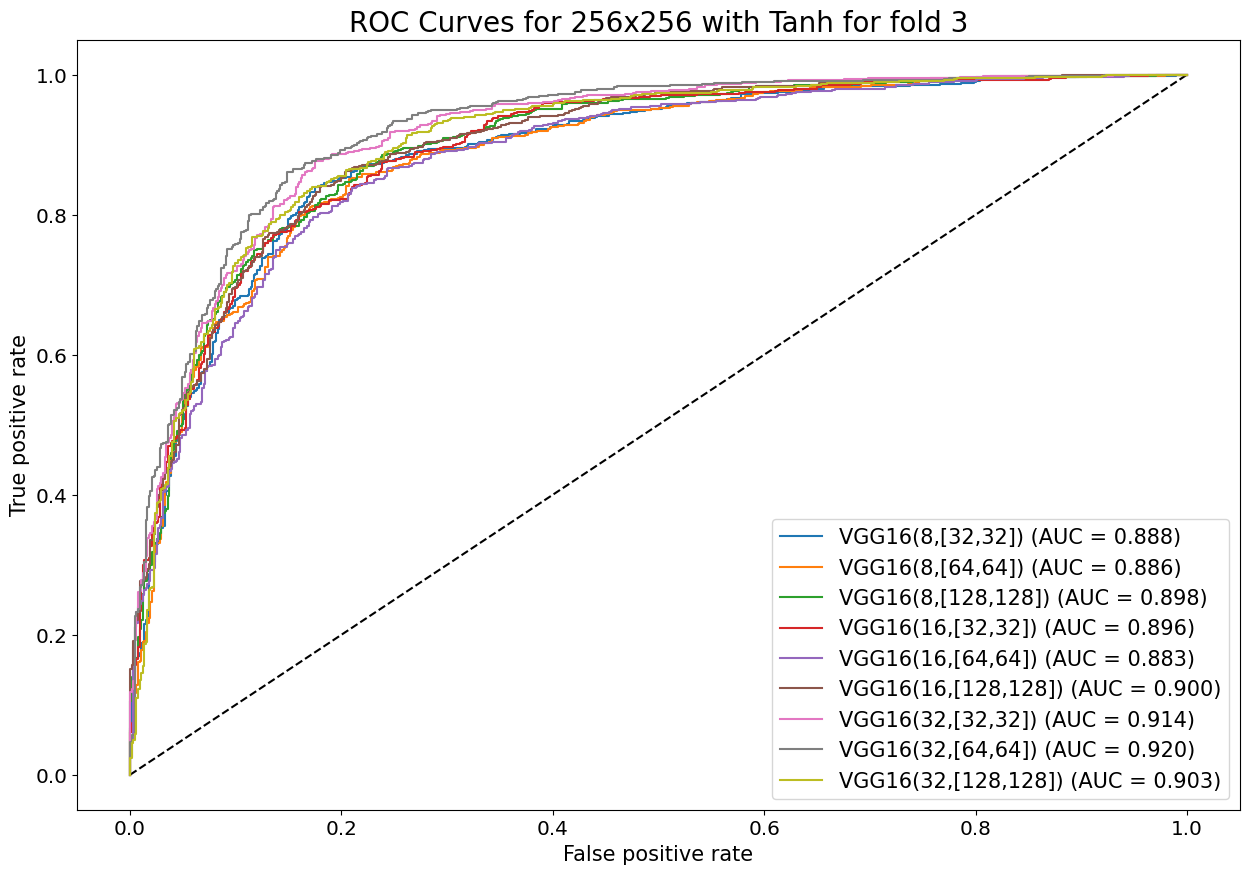

In [32]:
plot_roc(y_val_folds[2], y_pred_list_256_tanh, legend_list_256_tanh, title__256_tanh, figures_path)

### 6.2 ROC Plots for 128x128 <a class="anchor" id="plot_roc_128"></a>

In [33]:
# Defining paths
data_dir = 'project_dataset/colon_images/'
NT_dir = os.path.join(data_dir, 'non-tumor/') # nT=non-Tumor
T_dir = os.path.join(data_dir, 'tumor/') # T=Tumor

# Defining constants
img_height=128
img_width=128

# Loads images 
t0=time.time()

NT_imgs = load_data(NT_dir, img_height, img_width, number_of_images = 2000, color = False)

print("Loading", len(NT_imgs)," non-tumor images took", round(time.time()-t0), "seconds")

t1=time.time()

T_imgs = load_data(T_dir, img_height, img_width, number_of_images = 2000, color = False)

print("Loading", len(T_imgs)," tumor images took", round(time.time()-t1), "seconds")

T_X=np.array(T_imgs)
NT_X=np.array(NT_imgs)
T_y = np.ones([len(T_imgs),1])
NT_y = np.zeros([len(NT_imgs),1])

del T_imgs, NT_imgs

gc.collect()

X = np.concatenate((T_X, NT_X))
y = np.concatenate((T_y, NT_y))

del T_X, NT_X, T_y, NT_y
gc.collect()

k=3
X, y = shuffle(X, y, random_state=0)
X_train_folds, X_val_folds, y_train_folds, y_val_folds = train_val_folds(X, y, k)
del X, y
gc.collect()

Loading 2000  non-tumor images took 99 seconds
Loading 2000  tumor images took 97 seconds
Loop 1: Training data size: 2667, Validation data size: 1333
Loop 2: Training data size: 2667, Validation data size: 1333
Loop 3: Training data size: 2666, Validation data size: 1334


0

#### 6.2.1 ROC Plots with ReLU Activation Functions

In [34]:
setting_01_fold_3_y_predicted_128 = model_128_dict["setting_01_fold_3"].predict(X_val_folds[2], batch_size = 32)

setting_03_fold_3_y_predicted_128 = model_128_dict["setting_03_fold_3"].predict(X_val_folds[2], batch_size = 32)

setting_05_fold_3_y_predicted_128 = model_128_dict["setting_05_fold_3"].predict(X_val_folds[2], batch_size = 32)

setting_07_fold_3_y_predicted_128 = model_128_dict["setting_07_fold_3"].predict(X_val_folds[2], batch_size = 32)

setting_09_fold_3_y_predicted_128 = model_128_dict["setting_09_fold_3"].predict(X_val_folds[2], batch_size = 32)

setting_11_fold_3_y_predicted_128 = model_128_dict["setting_11_fold_3"].predict(X_val_folds[2], batch_size = 32)

setting_13_fold_3_y_predicted_128 = model_128_dict["setting_13_fold_3"].predict(X_val_folds[2], batch_size = 32)

setting_15_fold_3_y_predicted_128 = model_128_dict["setting_15_fold_3"].predict(X_val_folds[2], batch_size = 32)

setting_17_fold_3_y_predicted_128 = model_128_dict["setting_17_fold_3"].predict(X_val_folds[2], batch_size = 32)

title__128_relu = "ROC Curves for 128x128 with ReLU for fold 3"
y_pred_list_128_relu=[setting_01_fold_3_y_predicted_128, setting_03_fold_3_y_predicted_128, setting_05_fold_3_y_predicted_128,
             setting_07_fold_3_y_predicted_128, setting_09_fold_3_y_predicted_128, setting_11_fold_3_y_predicted_128,
             setting_13_fold_3_y_predicted_128, setting_15_fold_3_y_predicted_128, setting_17_fold_3_y_predicted_128]

legend_list_128_relu = ["VGG16(8,[32,32])", "VGG16(8,[64,64])", "VGG16(8,[128,128])",
               "VGG16(16,[32,32])", "VGG16(16,[64,64])", "VGG16(16,[128,128])",
               "VGG16(32,[32,32])", "VGG16(32,[64,64])", "VGG16(32,[128,128])"]

42/42 [==============================] - 1s 11ms/step


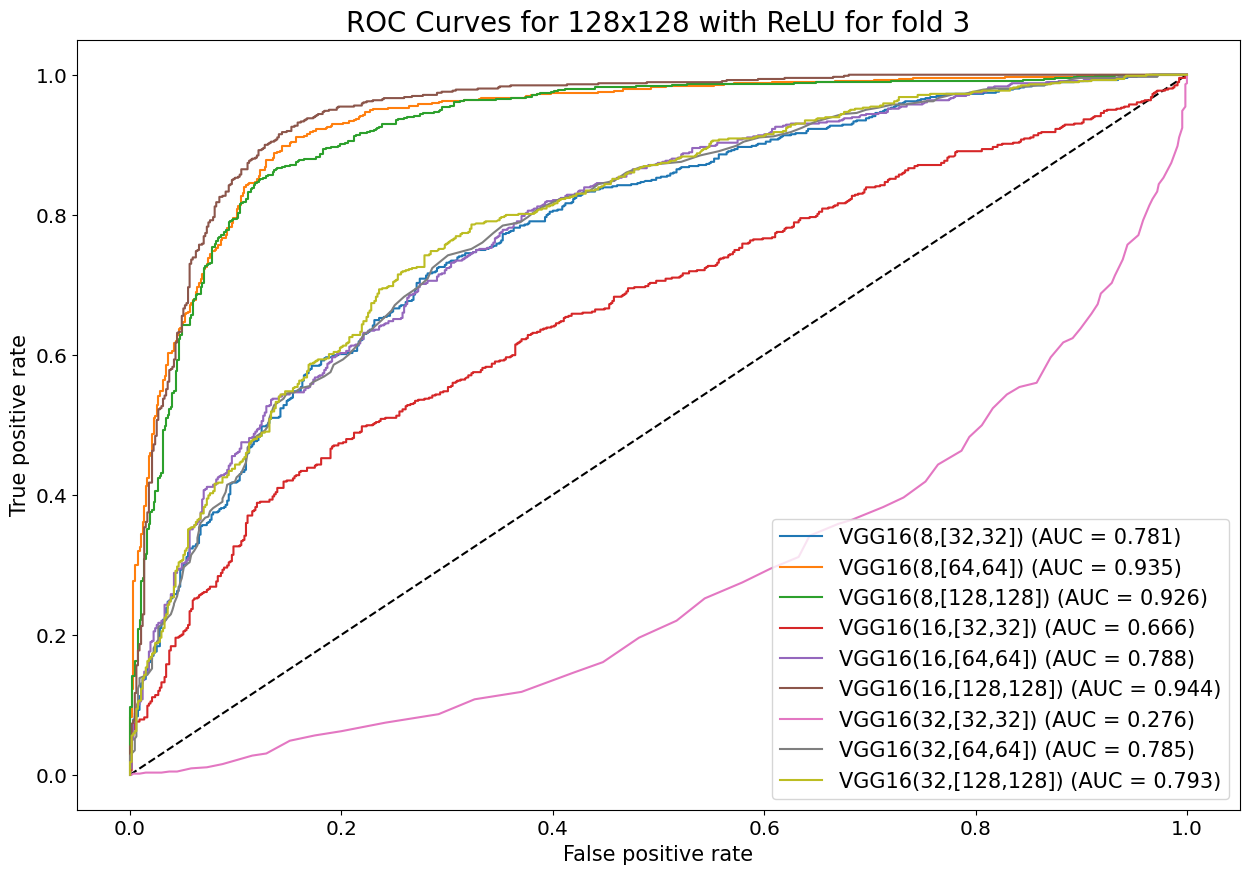

In [35]:
plot_roc(y_val_folds[2], y_pred_list_128_relu, legend_list_128_relu, title__128_relu, figures_path)

#### 6.2.1 ROC Plots with Tanh Activation Functions

In [36]:
setting_02_fold_3_y_predicted_128 = model_128_dict["setting_02_fold_3"].predict(X_val_folds[2], batch_size = 32)

setting_04_fold_3_y_predicted_128 = model_128_dict["setting_04_fold_3"].predict(X_val_folds[2], batch_size = 32)

setting_06_fold_3_y_predicted_128 = model_128_dict["setting_06_fold_3"].predict(X_val_folds[2], batch_size = 32)

setting_08_fold_3_y_predicted_128 = model_128_dict["setting_08_fold_3"].predict(X_val_folds[2], batch_size = 32)

setting_10_fold_3_y_predicted_128 = model_128_dict["setting_10_fold_3"].predict(X_val_folds[2], batch_size = 32)

setting_12_fold_3_y_predicted_128 = model_128_dict["setting_12_fold_3"].predict(X_val_folds[2], batch_size = 32)

setting_14_fold_3_y_predicted_128 = model_128_dict["setting_14_fold_3"].predict(X_val_folds[2], batch_size = 32)

setting_16_fold_3_y_predicted_128 = model_128_dict["setting_16_fold_3"].predict(X_val_folds[2], batch_size = 32)

setting_18_fold_3_y_predicted_128 = model_128_dict["setting_18_fold_3"].predict(X_val_folds[2], batch_size = 32)

title__128_tanh = "ROC Curves for 128x128 with Tanh for fold 3"
y_pred_list_128_tanh=[setting_02_fold_3_y_predicted_128, setting_04_fold_3_y_predicted_128, setting_06_fold_3_y_predicted_128,
             setting_08_fold_3_y_predicted_128, setting_10_fold_3_y_predicted_128, setting_12_fold_3_y_predicted_128,
             setting_14_fold_3_y_predicted_128, setting_16_fold_3_y_predicted_128, setting_18_fold_3_y_predicted_128]

legend_list_128_tanh = ["VGG16(8,[32,32])", "VGG16(8,[64,64])", "VGG16(8,[128,128])",
               "VGG16(16,[32,32])", "VGG16(16,[64,64])", "VGG16(16,[128,128])",
               "VGG16(32,[32,32])", "VGG16(32,[64,64])", "VGG16(32,[128,128])"]

42/42 [==============================] - 1s 10ms/step


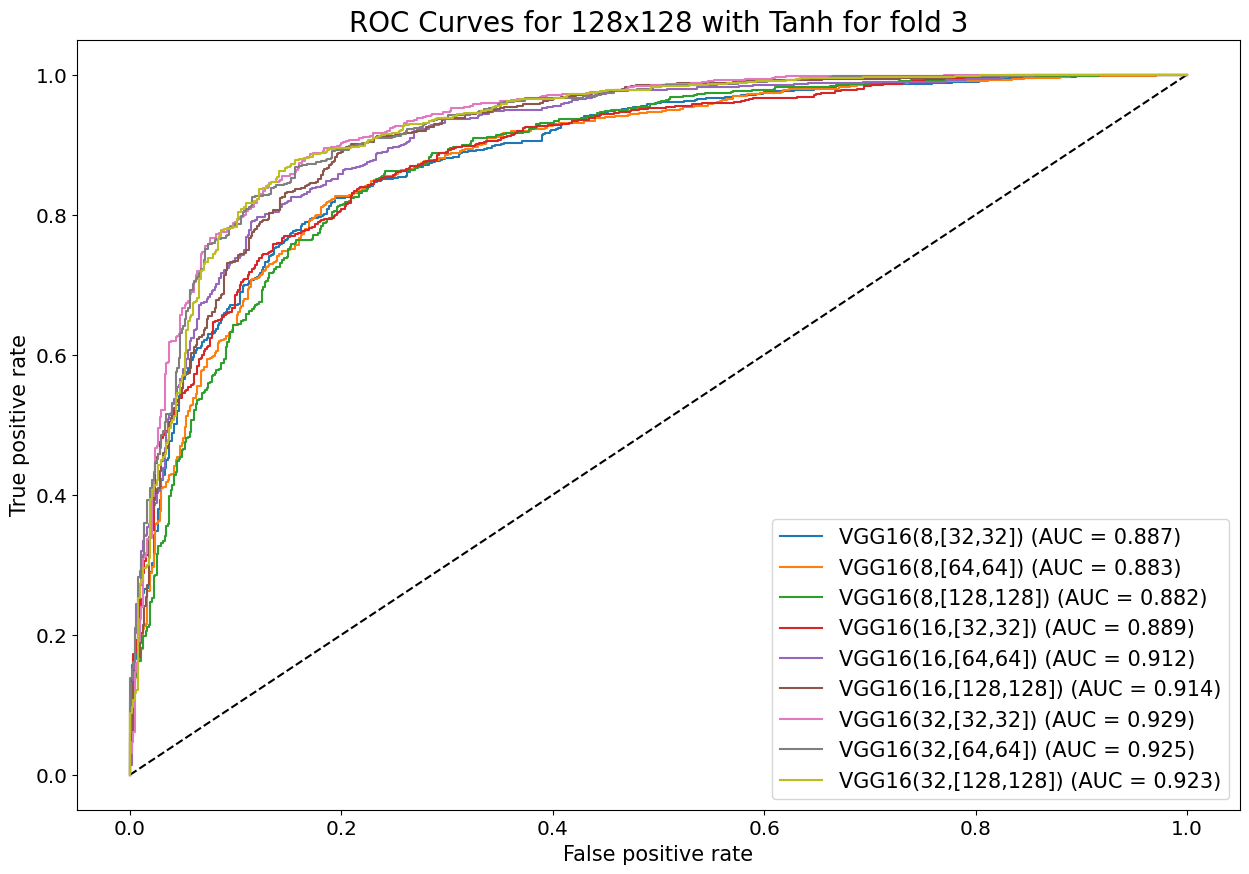

In [37]:
plot_roc(y_val_folds[2], y_pred_list_128_tanh, legend_list_128_tanh, title__128_tanh, figures_path)

### 7-Average Training Time Comparisons <a class="anchor" id="time_comp"></a>

As the last section, we analyzed the training times of different settings to see which factors are affecting the time needed for training the models the most.

In [38]:
report_256["Total_training_time_min"] = None
report_128["Total_training_time_min"] = None
report_256_pretrained["Total_training_time_min"] = None
report_128_pretrained["Total_training_time_min"] = None

report_256["Avg_training_time_min"] = None
report_128["Avg_training_time_min"] = None
report_256_pretrained["Avg_training_time_min"] = None
report_128_pretrained["Avg_training_time_min"] = None

In [39]:
for i in range(report_256.shape[0]):
    report_256.loc[i, "Total_training_time_min"] = (get_sec(report_256.loc[i, "CV1_train_time"]) +\
                                    get_sec(report_256.loc[i, "CV2_train_time"]) + get_sec(report_256.loc[i, "CV3_train_time"]))/60
for i in range(report_128.shape[0]):
    report_128.loc[i, "Total_training_time_min"] = (get_sec(report_128.loc[i, "CV1_train_time"]) +\
                                    get_sec(report_128.loc[i, "CV2_train_time"]) + get_sec(report_128.loc[i, "CV3_train_time"]))/60
    
for i in range(report_256_pretrained.shape[0]):
    report_256_pretrained.loc[i, "Total_training_time_min"] = (get_sec(report_256_pretrained.loc[i, "CV1_train_time"]) +\
                                    get_sec(report_256_pretrained.loc[i, "CV2_train_time"]) + get_sec(report_256_pretrained.loc[i, "CV3_train_time"]))/60
for i in range(report_128_pretrained.shape[0]):
    report_128_pretrained.loc[i, "Total_training_time_min"] = (get_sec(report_128_pretrained.loc[i, "CV1_train_time"]) +\
                                    get_sec(report_128_pretrained.loc[i, "CV2_train_time"]) + get_sec(report_128_pretrained.loc[i, "CV3_train_time"]))/60
    
report_256["Avg_training_time_min"] = report_256["Total_training_time_min"]/3
report_128["Avg_training_time_min"] = report_128["Total_training_time_min"]/3
report_256_pretrained["Avg_training_time_min"] = report_256_pretrained["Total_training_time_min"]/3
report_128_pretrained["Avg_training_time_min"] = report_128_pretrained["Total_training_time_min"]/3


In [40]:
chosen_columns = ["Setting_number", "n_base", "dense_layers", "act_func", 
                  "CV1_train_time", "CV2_train_time", "CV3_train_time", 
                  "Total_training_time_min", "Avg_training_time_min"]
report_256[chosen_columns]

,Setting_number,n_base,dense_layers,act_func,CV1_train_time,CV2_train_time,CV3_train_time,Total_training_time_min,Avg_training_time_min
0,1,8,"[32, 32]",relu,00:07:20,00:07:23,00:07:24,22.116667,7.372222
1,2,8,"[32, 32]",tanh,00:07:22,00:07:22,00:07:17,22.016667,7.338889
2,3,8,"[64, 64]",relu,00:07:22,00:07:24,00:07:23,22.15,7.383333
3,4,8,"[64, 64]",tanh,00:07:19,00:07:21,00:07:22,22.033333,7.344444
4,5,8,"[128, 128]",relu,00:07:20,00:07:22,00:07:26,22.133333,7.377778
5,6,8,"[128, 128]",tanh,00:07:22,00:07:21,00:07:22,22.083333,7.361111
6,7,16,"[32, 32]",relu,00:12:10,00:12:20,00:12:27,36.95,12.316667
7,8,16,"[32, 32]",tanh,00:12:23,00:12:14,00:12:24,37.016667,12.338889
8,9,16,"[64, 64]",relu,00:12:12,00:12:18,00:12:14,36.733333,12.244444
9,10,16,"[64, 64]",tanh,00:12:23,00:12:19,00:12:25,37.116667,12.372222


In [41]:
report_128[chosen_columns]

,Setting_number,n_base,dense_layers,act_func,CV1_train_time,CV2_train_time,CV3_train_time,Total_training_time_min,Avg_training_time_min
0,1,8,"[32, 32]",relu,00:03:35,00:03:35,00:03:26,10.6,3.533333
1,2,8,"[32, 32]",tanh,00:03:28,00:03:30,00:03:31,10.483333,3.494444
2,3,8,"[64, 64]",relu,00:03:31,00:03:36,00:03:36,10.716667,3.572222
3,4,8,"[64, 64]",tanh,00:03:33,00:03:34,00:03:32,10.65,3.55
4,5,8,"[128, 128]",relu,00:03:27,00:03:33,00:03:31,10.516667,3.505556
5,6,8,"[128, 128]",tanh,00:03:30,00:03:29,00:03:33,10.533333,3.511111
6,7,16,"[32, 32]",relu,00:04:08,00:04:18,00:04:07,12.55,4.183333
7,8,16,"[32, 32]",tanh,00:04:11,00:04:10,00:04:13,12.566667,4.188889
8,9,16,"[64, 64]",relu,00:04:09,00:04:03,00:04:05,12.283333,4.094444
9,10,16,"[64, 64]",tanh,00:04:07,00:04:06,00:04:10,12.383333,4.127778


In [42]:
chosen_columns = ["Setting_number", "dense_layers", "act_func", 
                  "CV1_train_time", "CV2_train_time", "CV3_train_time", 
                  "Total_training_time_min", "Avg_training_time_min"]
report_256_pretrained[chosen_columns]

,Setting_number,dense_layers,act_func,CV1_train_time,CV2_train_time,CV3_train_time,Total_training_time_min,Avg_training_time_min
0,1,"[32, 32]",relu,00:00:36,00:00:35,00:00:35,1.766667,0.588889
1,2,"[32, 32]",tanh,00:00:35,00:00:35,00:00:35,1.75,0.583333
2,3,"[64, 64]",relu,00:00:37,00:00:36,00:00:35,1.8,0.6
3,4,"[64, 64]",tanh,00:00:34,00:00:35,00:00:37,1.766667,0.588889
4,5,"[128, 128]",relu,00:00:37,00:00:38,00:00:38,1.883333,0.627778
5,6,"[128, 128]",tanh,00:00:38,00:00:35,00:00:36,1.816667,0.605556


In [43]:
report_128_pretrained[chosen_columns]

,Setting_number,dense_layers,act_func,CV1_train_time,CV2_train_time,CV3_train_time,Total_training_time_min,Avg_training_time_min
0,1,"[32, 32]",relu,00:00:32,00:00:32,00:00:32,1.6,0.533333
1,2,"[32, 32]",tanh,00:00:31,00:00:31,00:00:31,1.55,0.516667
2,3,"[64, 64]",relu,00:00:32,00:00:31,00:00:32,1.583333,0.527778
3,4,"[64, 64]",tanh,00:00:31,00:00:32,00:00:32,1.583333,0.527778
4,5,"[128, 128]",relu,00:00:33,00:00:31,00:00:32,1.6,0.533333
5,6,"[128, 128]",tanh,00:00:33,00:00:31,00:00:32,1.6,0.533333
